### Multi-omic Dataset: Latent representation using Kernel PCA
- Load Data
- Normalize Data
- Define Autoencoder Model
- Train Autoencoder with normalized dataset
- Use transformed dataset for classification
- Use transformed dataset for clustering
- Evaluation and Conclusions

In [2]:
import Models
import numpy as np
import random as rn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# Load Data
X_brca_methyl_data = pd.read_csv('./BRCA_methylation.txt', sep=',', index_col=0) # Dataset has Donor ID as first column
X_brca_mRNA_data = pd.read_csv('./BRCA_mRNA.txt', sep=',', index_col=0) # Dataset has Donor ID as first column
X_brca_CNA_data = pd.read_csv('./BRCA_CNA.txt', sep=',' ,index_col=0) # Dataset has Donor ID as first column
y_brca_data = pd.read_csv('./BRCA_Clinical.txt', sep=',', index_col=0, names=["Label"]) # Dataset has Donor ID on first column and Label on second column.

X_brca_methyl_filtered = X_brca_methyl_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01"], axis=1)
X_brca_mRNA_filtered = X_brca_mRNA_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01","TCGA-BH-A18V-06"], axis=1)
X_brca_CNA_filtered = X_brca_CNA_data.drop(["TCGA-AR-A0U1-01"], axis=1)
y_brca_filtered = y_brca_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01","TCGA-BH-A18V-06"], axis=0)

X_train_first_norm, X_train_second_norm, X_swapped_first_norm, X_swapped_second_norm, X_test_first_norm, X_test_second_norm, X_train_concat, X_swapped_concat, X_test_concat, y_train, y_test, y_train_oh, y_test_oh \
    = Models.prepare_datasets(X_brca_methyl_filtered.T,X_brca_mRNA_filtered.T, y_brca_filtered, test_size=0.2, swap_noise=0.15)


swapping: 20 rows.


In [50]:
import importlib
importlib.reload(Models)

<module 'Models' from 'C:\\Desarrollo\\Data Science\\Jupyter Notebooks\\Stage\\oss-stage-2019\\Multiomic Dataset\\Models.py'>

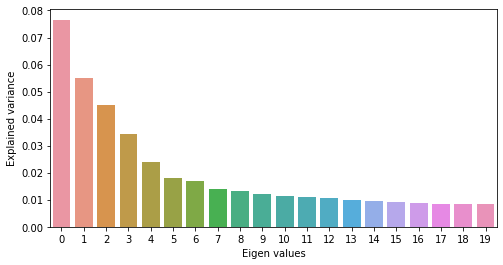

0.2532110427393668


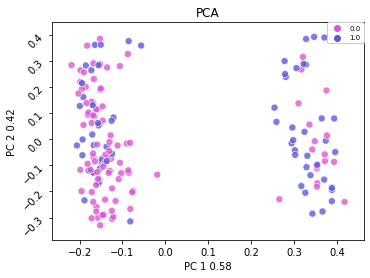

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



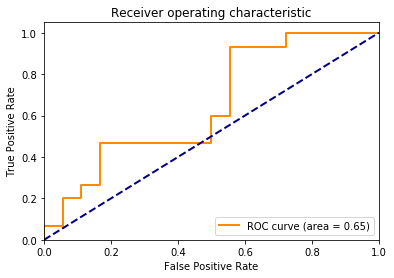

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


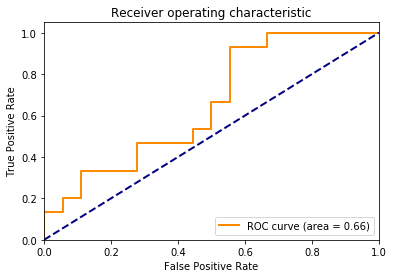

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6615384615384615 

Best #estimators: 100 

Best max depth: 12 



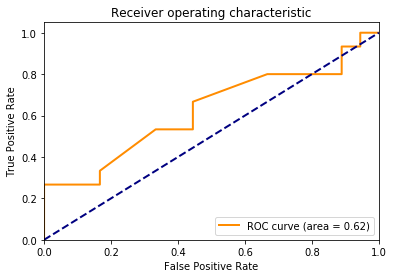

[[18  0]
 [12  3]]


              precision    recall  f1-score   support

           0       0.60      1.00      0.75        18
           1       1.00      0.20      0.33        15

    accuracy                           0.64        33
   macro avg       0.80      0.60      0.54        33
weighted avg       0.78      0.64      0.56        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364


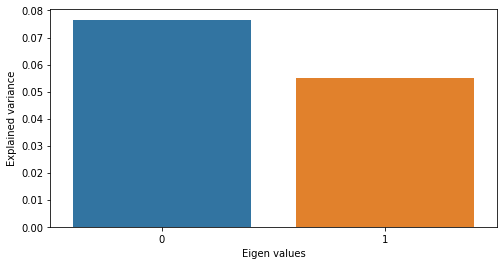

PCA on single-modal explained variance ratio: 0.13149664700651276


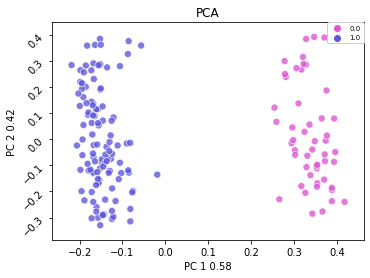

2 clusters -  silhoutte score: 0.08644901139699868 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.05069986549772037 - mutual information: 0.06795859864490769
4 clusters -  silhoutte score: 0.05012728360369413 - mutual information: 0.06825430877122635


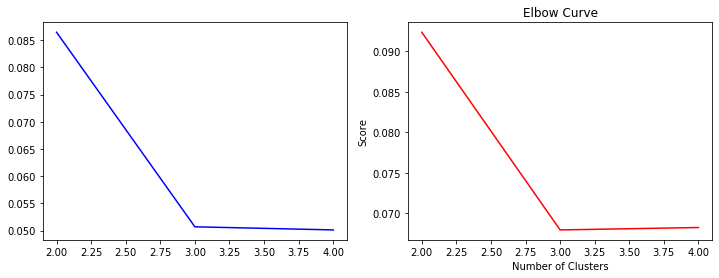

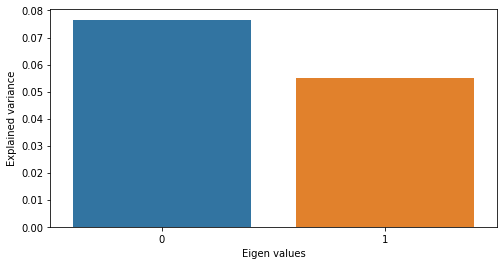

PCA on single-modal explained variance ratio: 0.13149664700651276


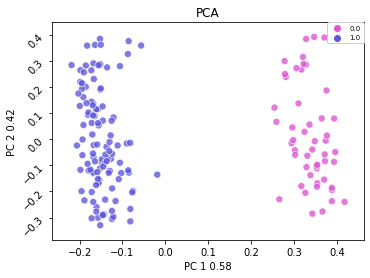

2 clusters -  silhoutte score: 0.08644901139699868 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.047920529851812846 - mutual information: 0.0741883177309165
4 clusters -  silhoutte score: 0.04285855526778053 - mutual information: 0.1257384331506291


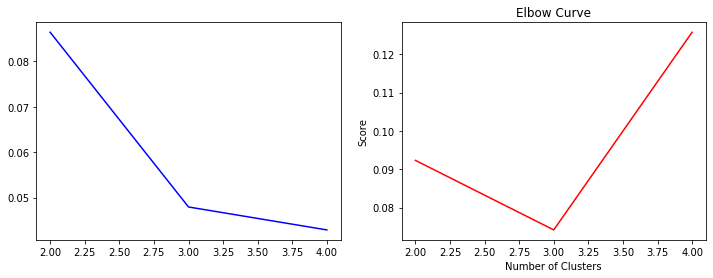

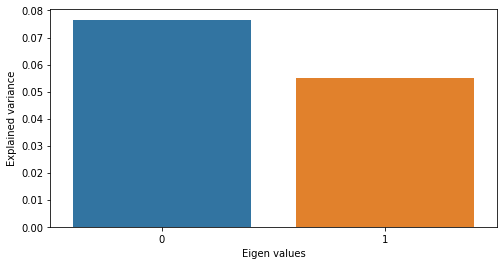

PCA on single-modal explained variance ratio: 0.13149664700651276


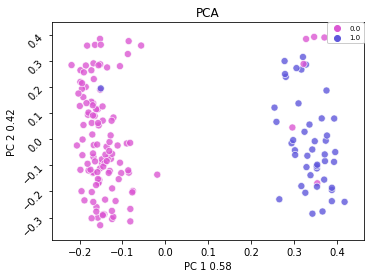

2 clusters -  silhoutte score: 0.07069674402930021 - mutual information: 0.058558961523828015
3 clusters -  silhoutte score: 0.052279612125521006 - mutual information: 0.04602040264279025
4 clusters -  silhoutte score: 0.04185462614752428 - mutual information: 0.0521352729203352


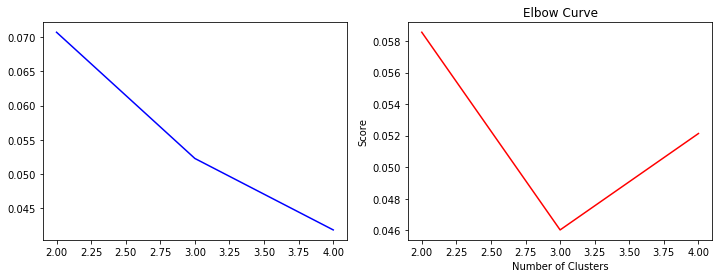

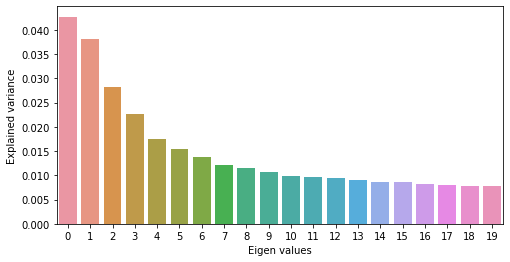

0.16429130470246778


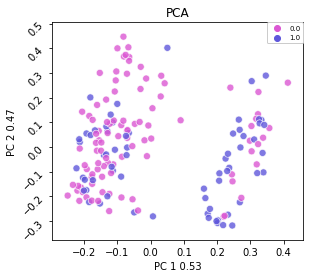

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



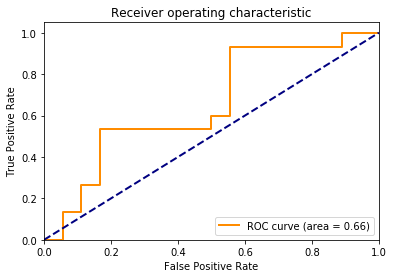

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


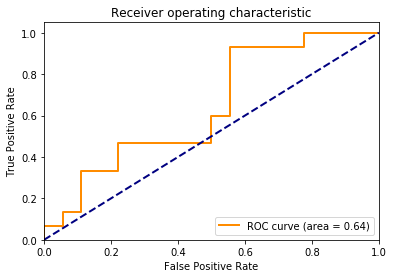

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6307692307692309 

Best #estimators: 100 

Best max depth: 12 



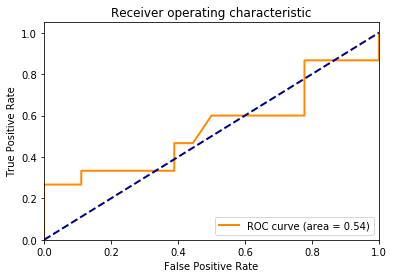

[[18  0]
 [11  4]]


              precision    recall  f1-score   support

           0       0.62      1.00      0.77        18
           1       1.00      0.27      0.42        15

    accuracy                           0.67        33
   macro avg       0.81      0.63      0.59        33
weighted avg       0.79      0.67      0.61        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.666667


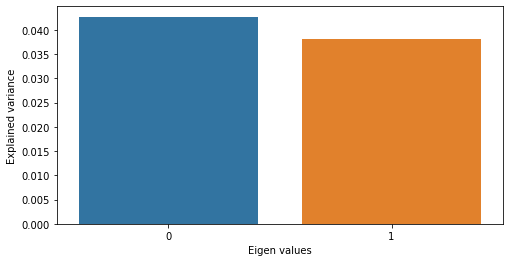

PCA on single-modal explained variance ratio: 0.08073286350782044


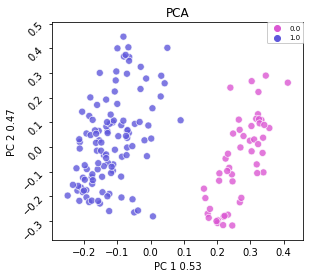

2 clusters -  silhoutte score: 0.045010700061075076 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.021438040889995628 - mutual information: 0.06888775533866529
4 clusters -  silhoutte score: 0.01714219120940988 - mutual information: 0.0509705993947004


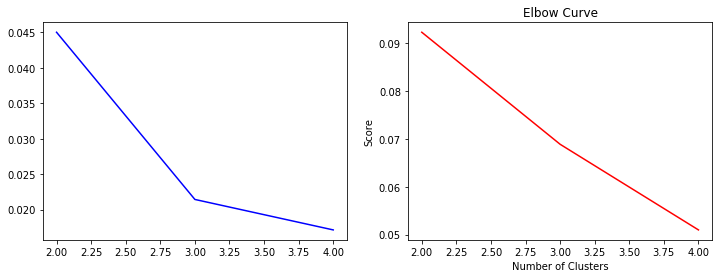

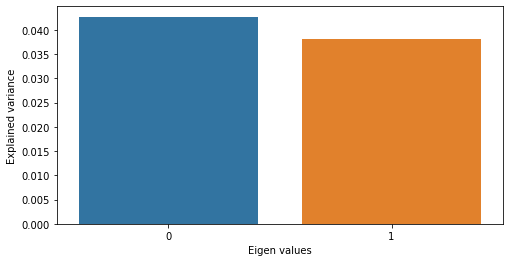

PCA on single-modal explained variance ratio: 0.08073286350782044


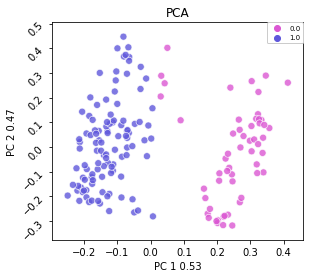

2 clusters -  silhoutte score: 0.03958038883717626 - mutual information: 0.07295248382603779
3 clusters -  silhoutte score: 0.010455604201042268 - mutual information: 0.10187783897326379
4 clusters -  silhoutte score: 0.01058682922701395 - mutual information: 0.1259599311558428


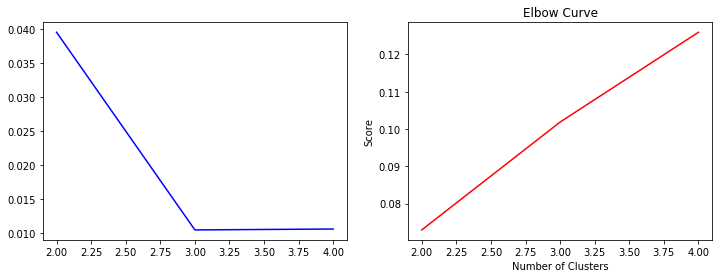

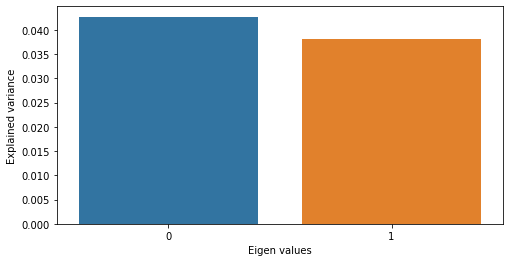

PCA on single-modal explained variance ratio: 0.08073286350782044


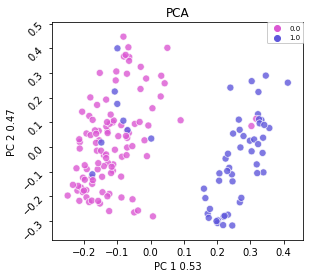

2 clusters -  silhoutte score: 0.03274185248144709 - mutual information: 0.06718980142463618
3 clusters -  silhoutte score: 0.01941663026590741 - mutual information: 0.051024841486986584
4 clusters -  silhoutte score: 0.019426554847644027 - mutual information: 0.0984330330874015


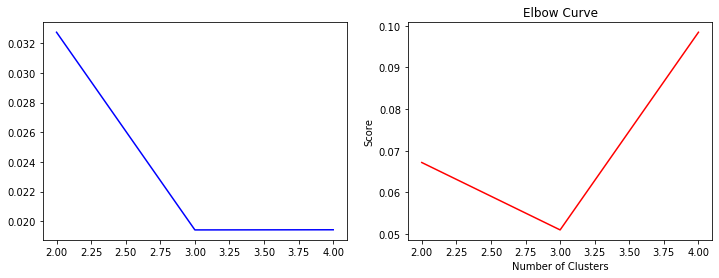

F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\utils\extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


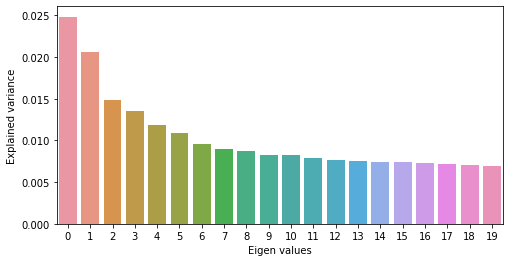

0.09661439600117754


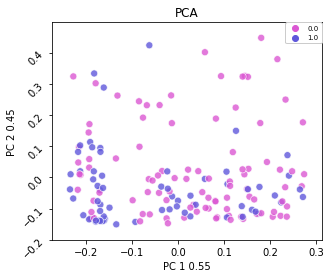

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



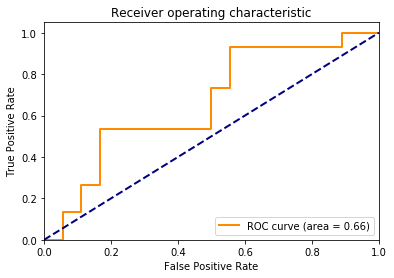

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


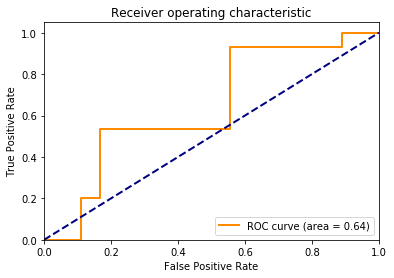

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6923076923076923 

Best #estimators: 140 

Best max depth: None 



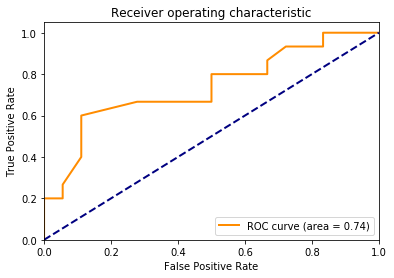

[[17  1]
 [12  3]]


              precision    recall  f1-score   support

           0       0.59      0.94      0.72        18
           1       0.75      0.20      0.32        15

    accuracy                           0.61        33
   macro avg       0.67      0.57      0.52        33
weighted avg       0.66      0.61      0.54        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061


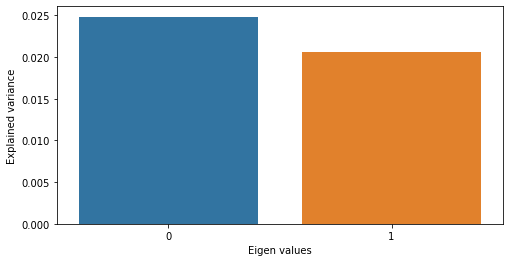

PCA on single-modal explained variance ratio: 0.04543554057723838


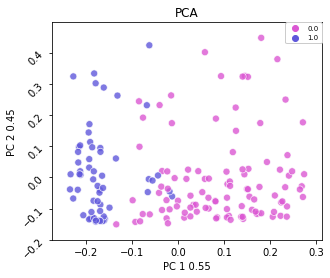

2 clusters -  silhoutte score: 0.018000895512709975 - mutual information: 0.06269624871749445
3 clusters -  silhoutte score: 0.007602821667684731 - mutual information: 0.029329503359090604
4 clusters -  silhoutte score: 0.005366897243006955 - mutual information: 0.01926616759112125


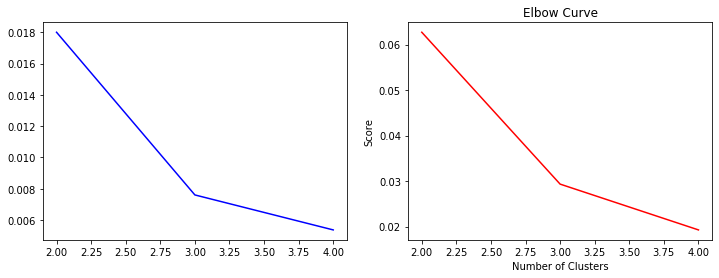

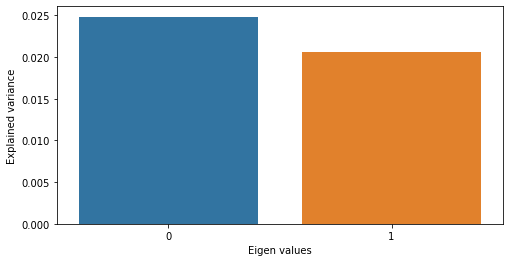

PCA on single-modal explained variance ratio: 0.04543554057723838


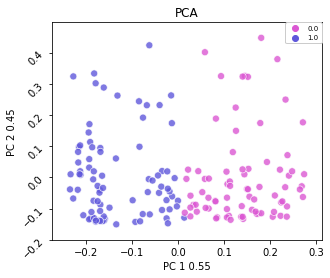

2 clusters -  silhoutte score: 0.013902098719507643 - mutual information: 0.04264655451646867
3 clusters -  silhoutte score: 0.0034256722801906925 - mutual information: 0.060729480760639706
4 clusters -  silhoutte score: 0.005643070410689396 - mutual information: 0.05771818971255191


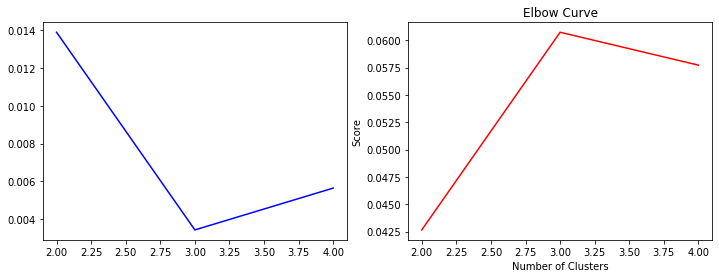

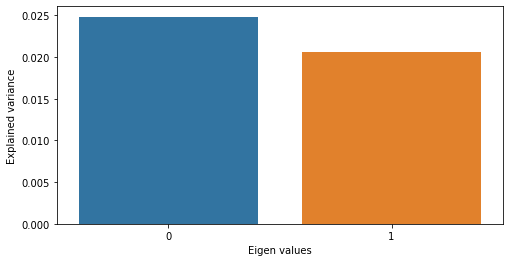

PCA on single-modal explained variance ratio: 0.04543554057723838


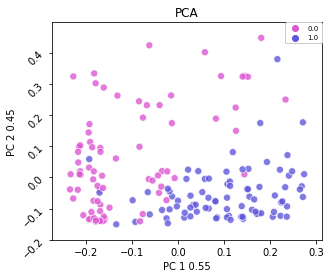

2 clusters -  silhoutte score: 0.01145912231197798 - mutual information: 0.011511617090197494
3 clusters -  silhoutte score: 0.0014844295987549664 - mutual information: 0.020010230878618585
4 clusters -  silhoutte score: 0.003138391896575493 - mutual information: 0.02479108834034779


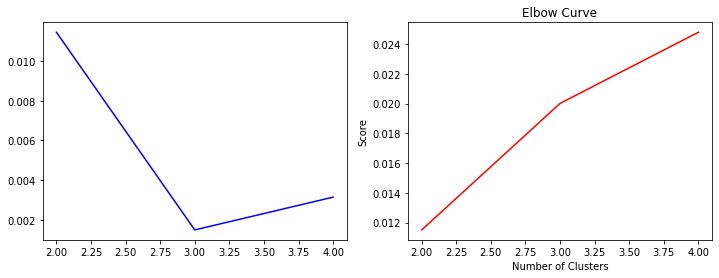

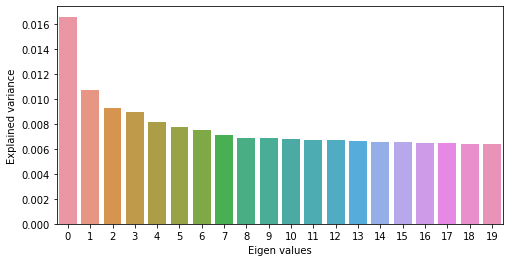

0.061407796669808376


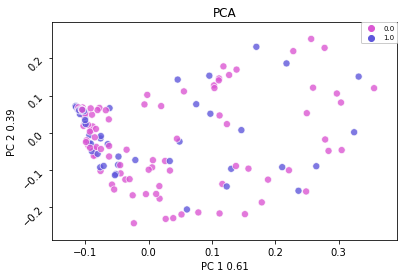

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



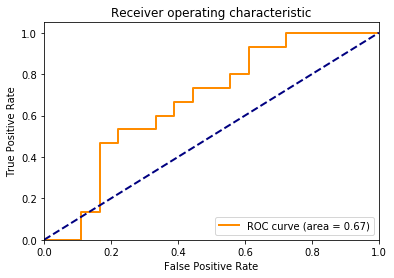

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


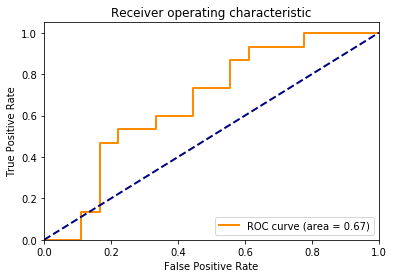

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.7076923076923076 

Best #estimators: 140 

Best max depth: None 



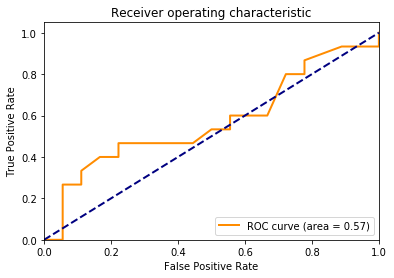

[[16  2]
 [10  5]]


              precision    recall  f1-score   support

           0       0.62      0.89      0.73        18
           1       0.71      0.33      0.45        15

    accuracy                           0.64        33
   macro avg       0.66      0.61      0.59        33
weighted avg       0.66      0.64      0.60        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364


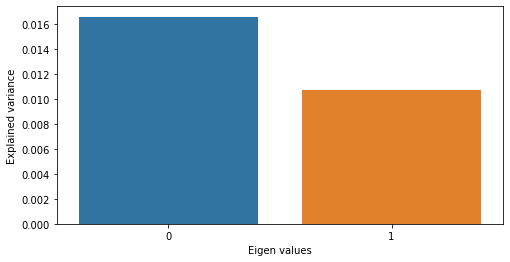

PCA on single-modal explained variance ratio: 0.027344388116495366


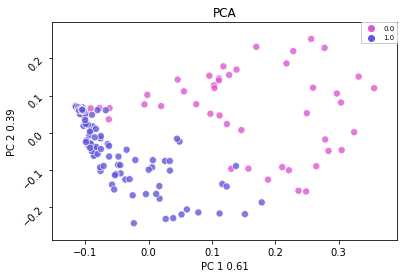

2 clusters -  silhoutte score: 0.0036836562571620477 - mutual information: 0.0018820448471112566
3 clusters -  silhoutte score: 0.0022147039754462946 - mutual information: 0.01628996801485082
4 clusters -  silhoutte score: 0.002865100061188469 - mutual information: 0.026246326259300533


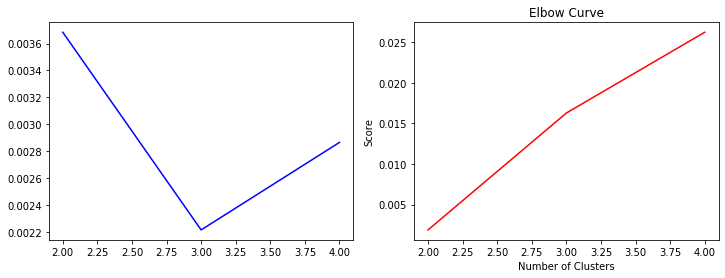

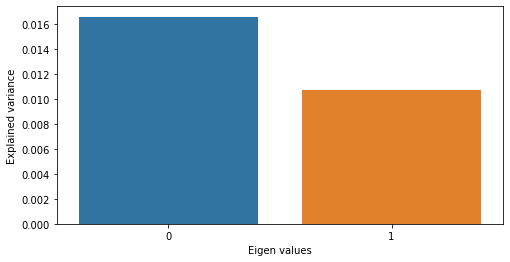

PCA on single-modal explained variance ratio: 0.027344388116495366


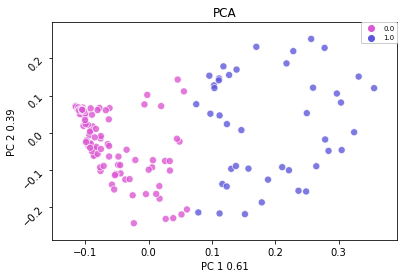

2 clusters -  silhoutte score: 0.004633786617196335 - mutual information: 0.01280585098168191
3 clusters -  silhoutte score: 0.003111917050005804 - mutual information: 0.02284971071303825
4 clusters -  silhoutte score: 0.003516133530706612 - mutual information: 0.03125139163647761


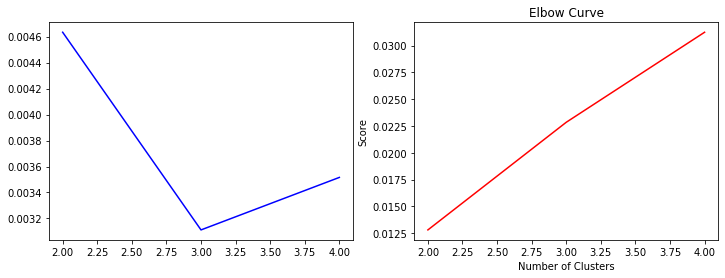

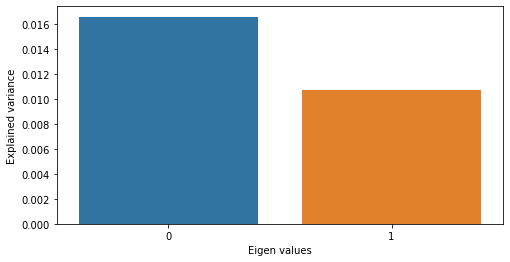

PCA on single-modal explained variance ratio: 0.027344388116495366


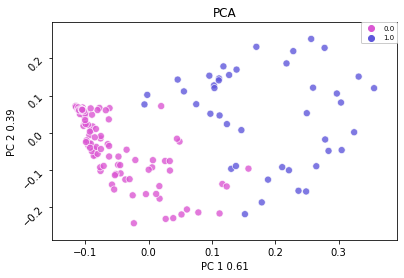

2 clusters -  silhoutte score: 0.0044257833397561095 - mutual information: 0.010759637246132294
3 clusters -  silhoutte score: 0.004667287885493111 - mutual information: 0.031745359159156224
4 clusters -  silhoutte score: 0.0023604230149608272 - mutual information: 0.029105495597771338


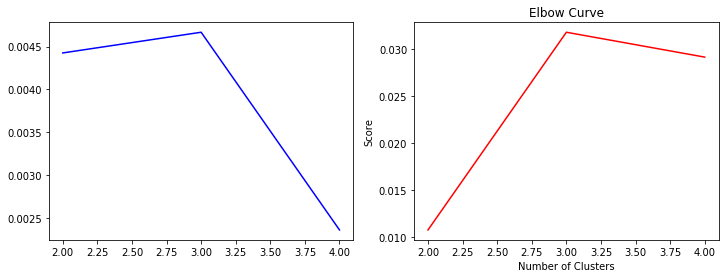

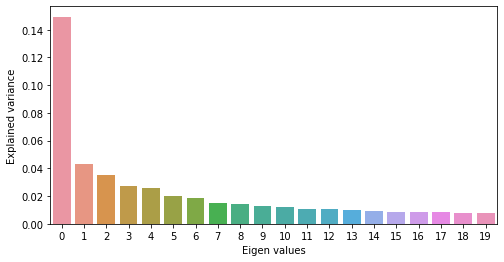

0.30135852696722354


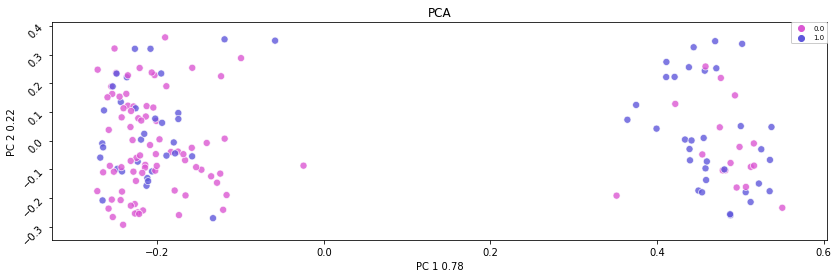

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



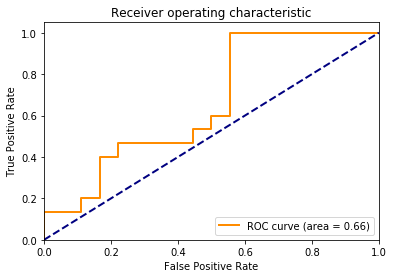

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6769230769230768 

Best C: 1.0 

Best Gamma: 0.1 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


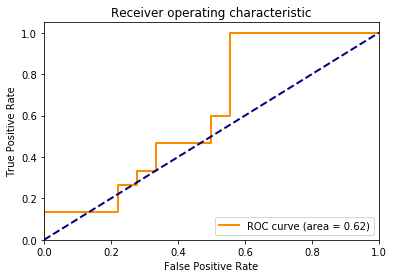

[[9 9]
 [7 8]]


              precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.47      0.53      0.50        15

    accuracy                           0.52        33
   macro avg       0.52      0.52      0.51        33
weighted avg       0.52      0.52      0.52        33

Training set score for SVM: 0.746154
Testing  set score for SVM: 0.515152
Best score for training data: 0.6461538461538461 

Best #estimators: 140 

Best max depth: None 



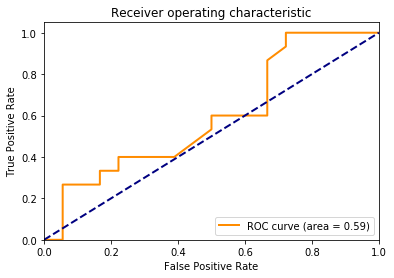

[[17  1]
 [11  4]]


              precision    recall  f1-score   support

           0       0.61      0.94      0.74        18
           1       0.80      0.27      0.40        15

    accuracy                           0.64        33
   macro avg       0.70      0.61      0.57        33
weighted avg       0.69      0.64      0.58        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364


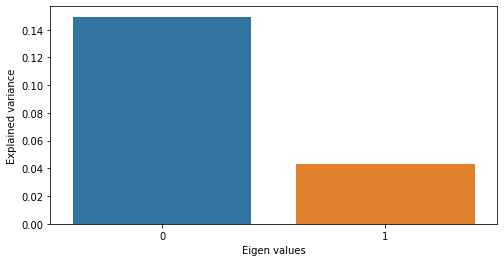

PCA on single-modal explained variance ratio: 0.19237699845692696


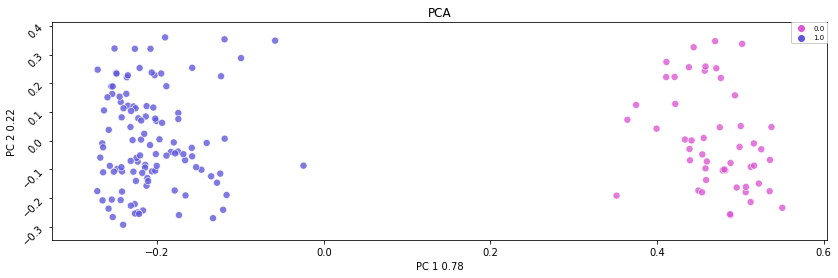

2 clusters -  silhoutte score: 0.164214608915859 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.06461955600415517 - mutual information: 0.07009267441453676
4 clusters -  silhoutte score: 0.054608195228730554 - mutual information: 0.07133947591059453


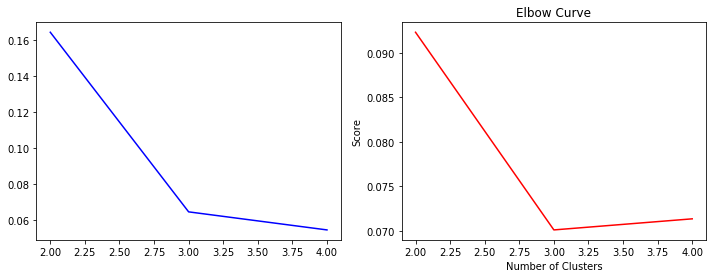

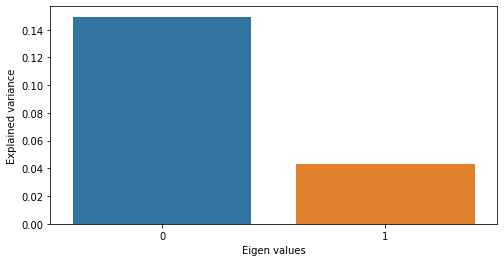

PCA on single-modal explained variance ratio: 0.19237699845692696


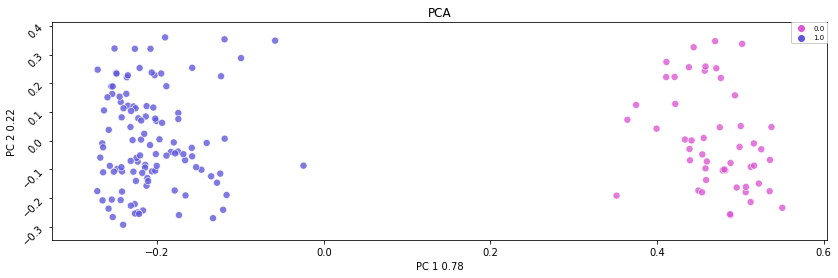

2 clusters -  silhoutte score: 0.164214608915859 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.06058132342644718 - mutual information: 0.07297206025180034
4 clusters -  silhoutte score: 0.04311900584154163 - mutual information: 0.12052036802800153


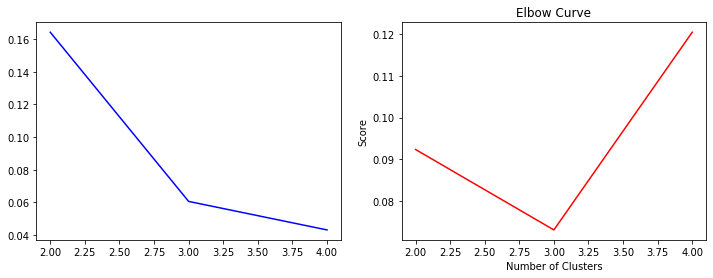

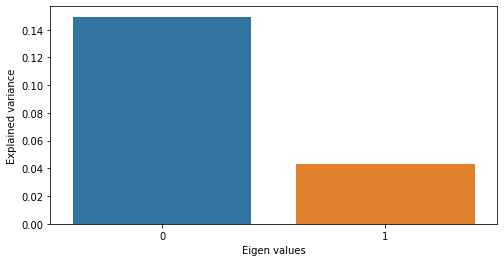

PCA on single-modal explained variance ratio: 0.19237699845692696


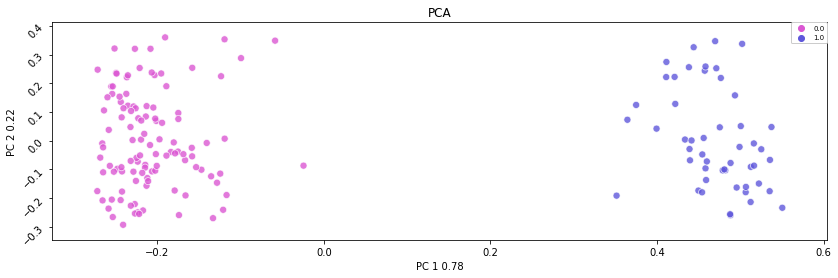

2 clusters -  silhoutte score: 0.164214608915859 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.06641713093414431 - mutual information: 0.0695092266526935
4 clusters -  silhoutte score: 0.045581897977957 - mutual information: 0.11350397587449029


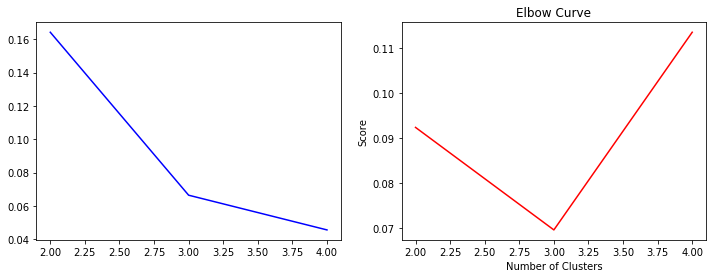

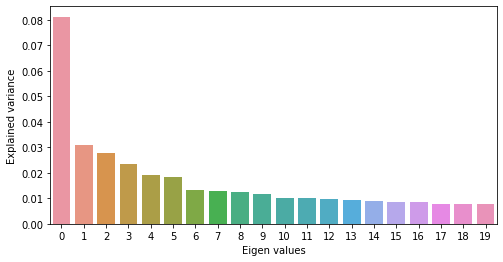

0.20075679580633013


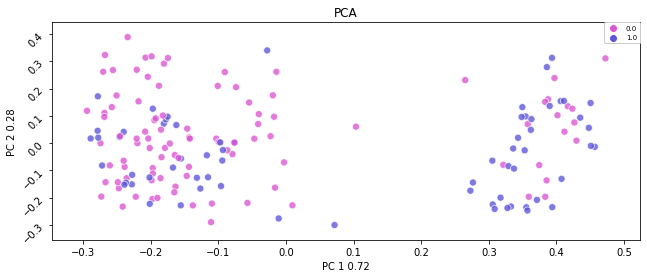

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



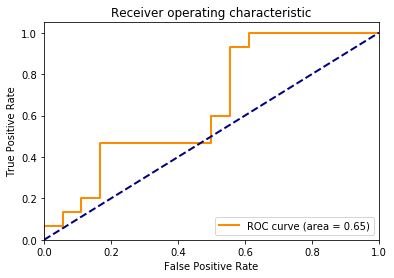

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


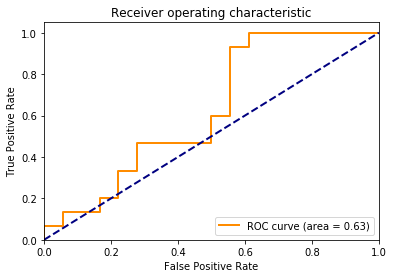

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.676923076923077 

Best #estimators: 100 

Best max depth: 12 



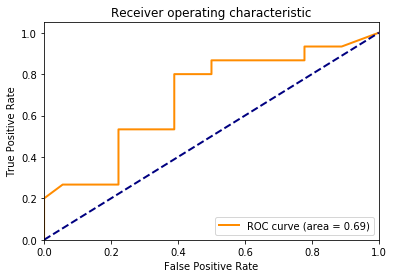

[[17  1]
 [11  4]]


              precision    recall  f1-score   support

           0       0.61      0.94      0.74        18
           1       0.80      0.27      0.40        15

    accuracy                           0.64        33
   macro avg       0.70      0.61      0.57        33
weighted avg       0.69      0.64      0.58        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364


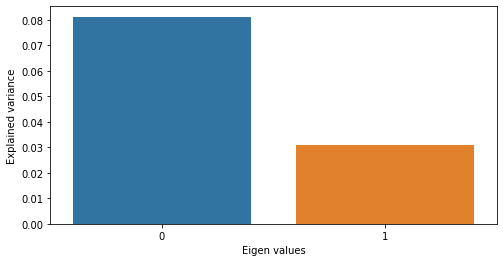

PCA on single-modal explained variance ratio: 0.11201779270053201


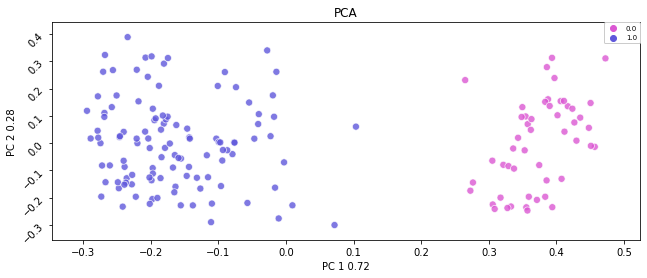

2 clusters -  silhoutte score: 0.08968292757944092 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.03326228737305983 - mutual information: 0.06734563304131312
4 clusters -  silhoutte score: 0.03185555748016849 - mutual information: 0.06911043531520711


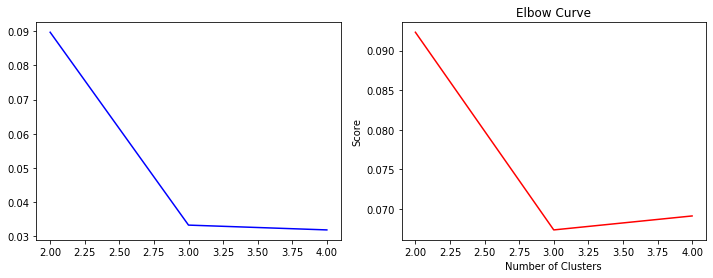

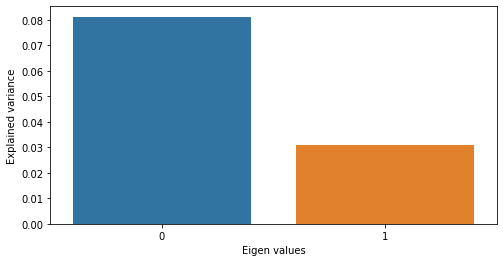

PCA on single-modal explained variance ratio: 0.11201779270053201


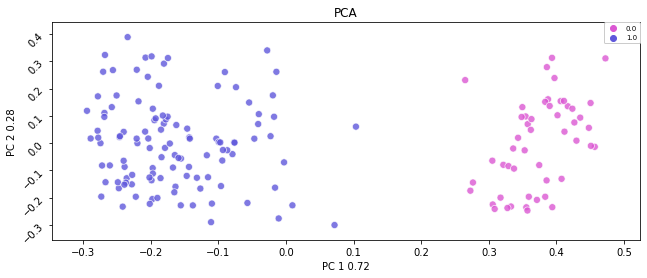

2 clusters -  silhoutte score: 0.08968292757944092 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.02083018255201237 - mutual information: 0.06615802595796373
4 clusters -  silhoutte score: 0.013954594178866724 - mutual information: 0.07290704176491872


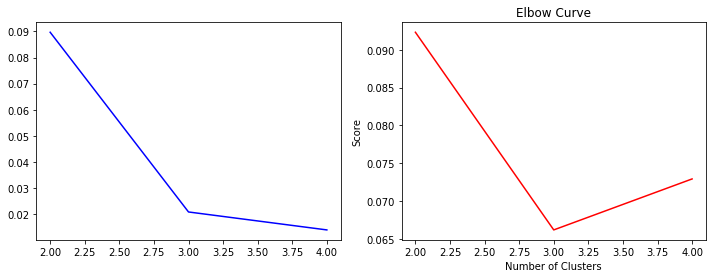

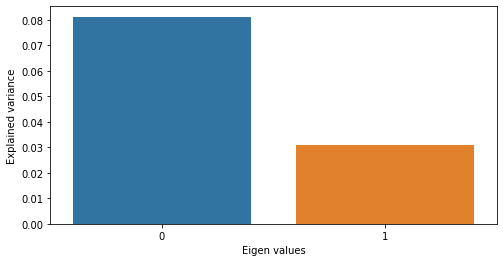

PCA on single-modal explained variance ratio: 0.11201779270053201


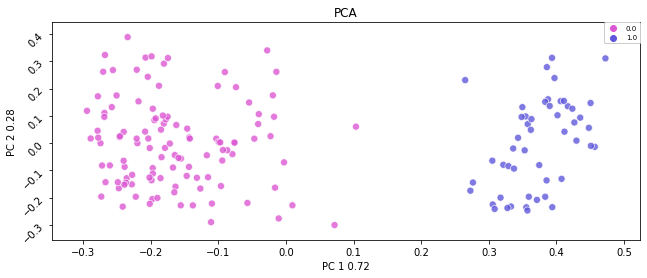

2 clusters -  silhoutte score: 0.08968292757944092 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.030293147320985838 - mutual information: 0.07462218891583093
4 clusters -  silhoutte score: 0.026436211939982978 - mutual information: 0.0897284368468353


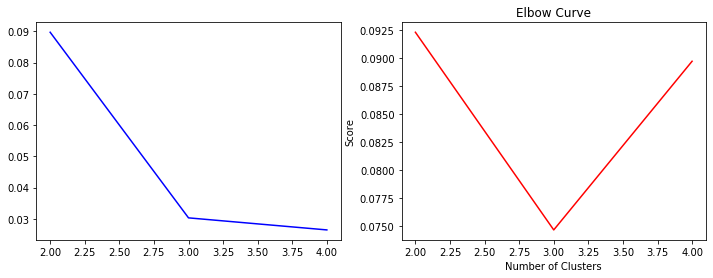

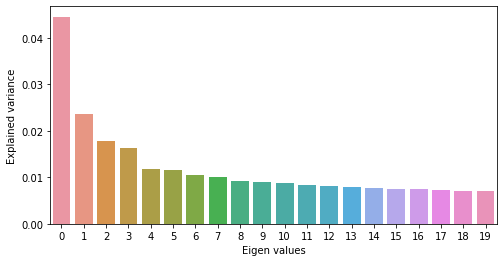

0.12560106910817165


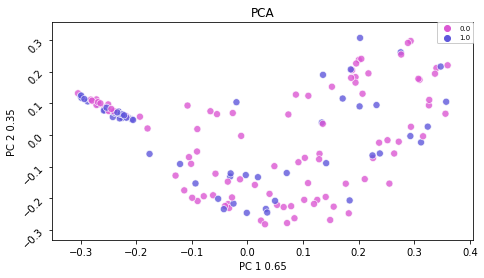

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



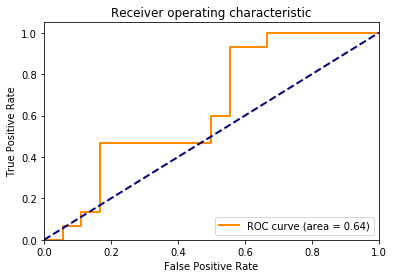

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


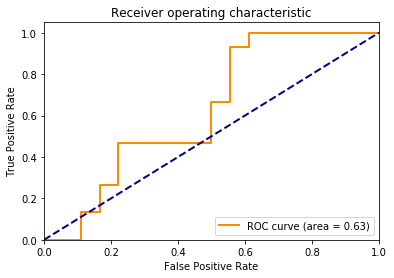

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.7 

Best #estimators: 140 

Best max depth: None 



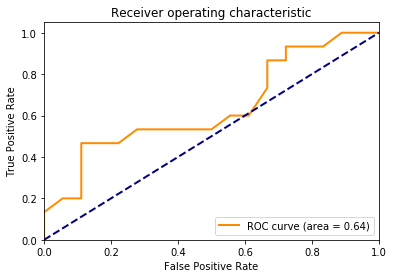

[[16  2]
 [12  3]]


              precision    recall  f1-score   support

           0       0.57      0.89      0.70        18
           1       0.60      0.20      0.30        15

    accuracy                           0.58        33
   macro avg       0.59      0.54      0.50        33
weighted avg       0.58      0.58      0.52        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.575758


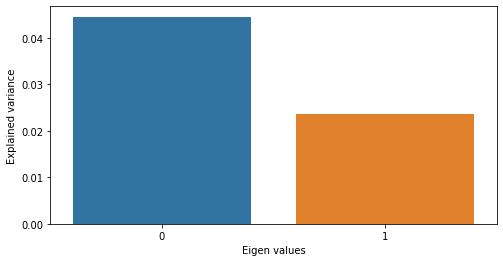

PCA on single-modal explained variance ratio: 0.06821236279349793


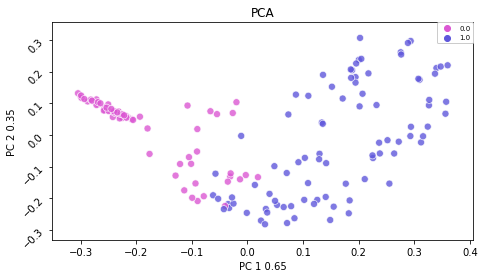

2 clusters -  silhoutte score: 0.032055977901776986 - mutual information: 0.052516385217800846
3 clusters -  silhoutte score: 0.017770680833612468 - mutual information: 0.06306326092093903
4 clusters -  silhoutte score: 0.010801751947945956 - mutual information: 0.06281796581483391


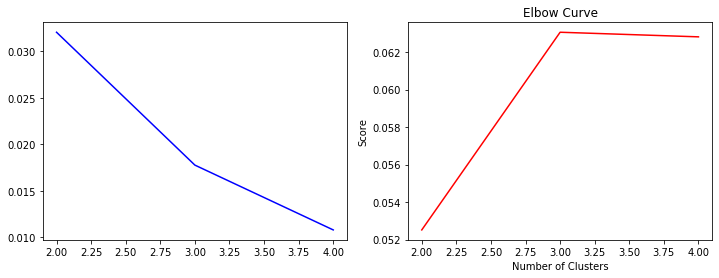

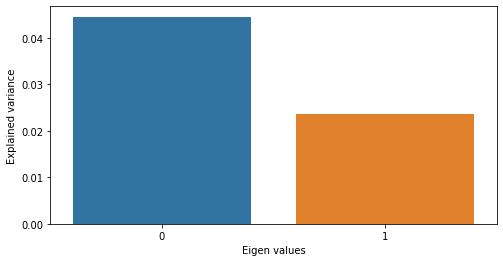

PCA on single-modal explained variance ratio: 0.06821236279349793


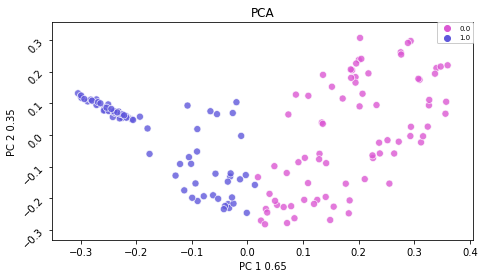

2 clusters -  silhoutte score: 0.02886433247134664 - mutual information: 0.04264655451646867
3 clusters -  silhoutte score: 0.017644617967132847 - mutual information: 0.051273438419425
4 clusters -  silhoutte score: 0.01292199618245977 - mutual information: 0.05521706204927052


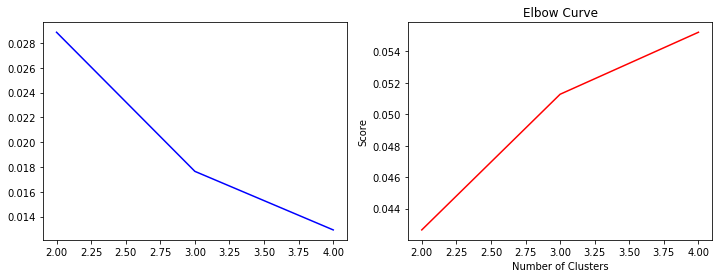

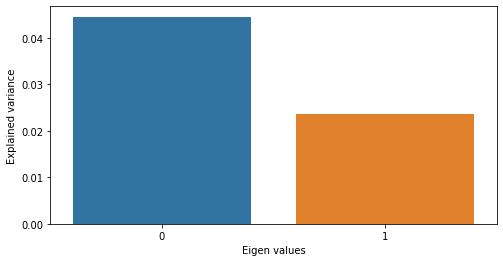

PCA on single-modal explained variance ratio: 0.06821236279349793


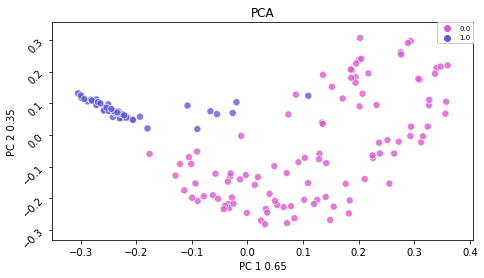

2 clusters -  silhoutte score: 0.037164117612824496 - mutual information: 0.05665386922450694
3 clusters -  silhoutte score: 0.019058419313842865 - mutual information: 0.0428299415757954
4 clusters -  silhoutte score: 0.017558057413157423 - mutual information: 0.044333976684935376


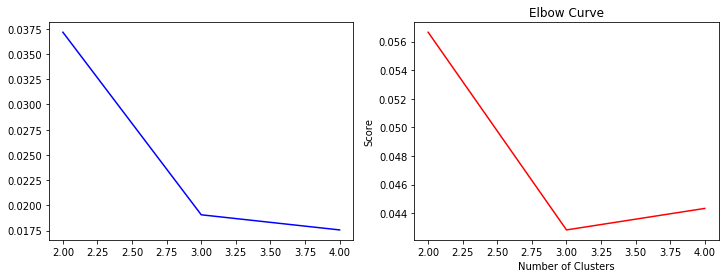

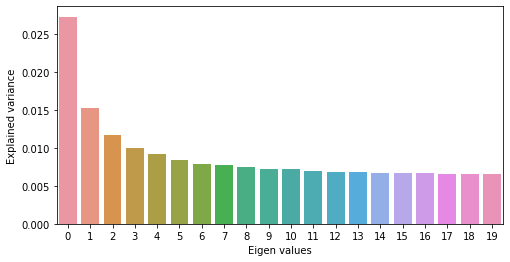

0.0819153334327703


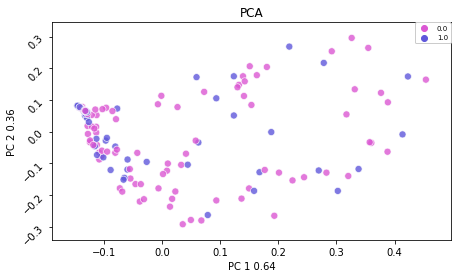

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



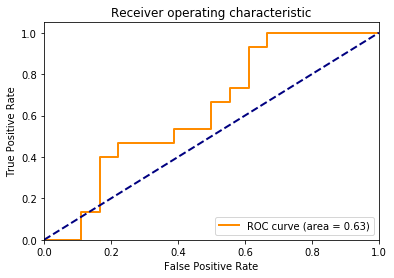

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


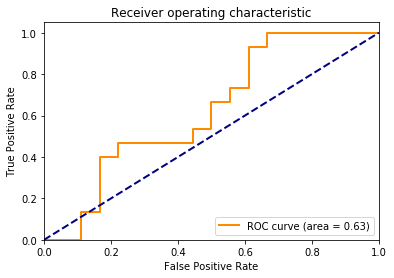

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.7 

Best #estimators: 140 

Best max depth: None 



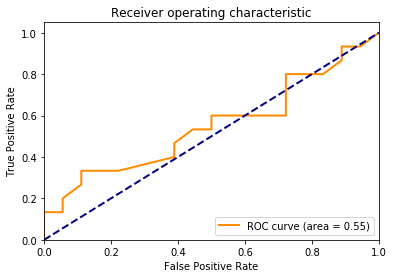

[[16  2]
 [10  5]]


              precision    recall  f1-score   support

           0       0.62      0.89      0.73        18
           1       0.71      0.33      0.45        15

    accuracy                           0.64        33
   macro avg       0.66      0.61      0.59        33
weighted avg       0.66      0.64      0.60        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364


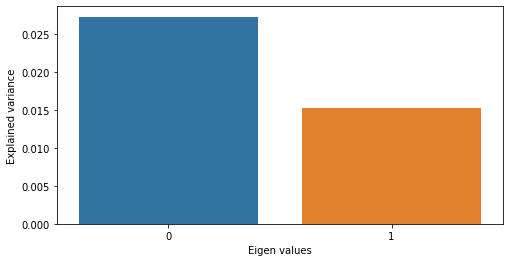

PCA on single-modal explained variance ratio: 0.042545769759704685


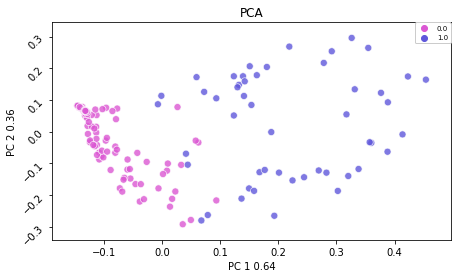

2 clusters -  silhoutte score: 0.010908277055051775 - mutual information: 0.010426925412746715
3 clusters -  silhoutte score: 0.006007761096486929 - mutual information: 0.03554030770008786
4 clusters -  silhoutte score: 0.0021630257387527047 - mutual information: 0.039674314299237595


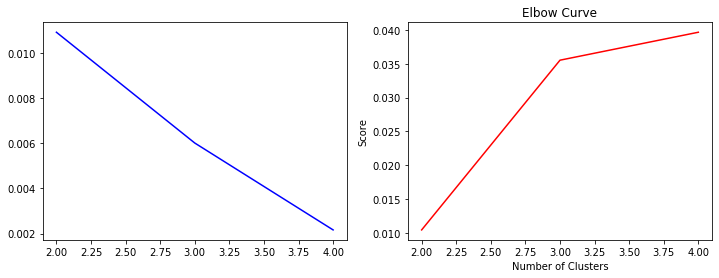

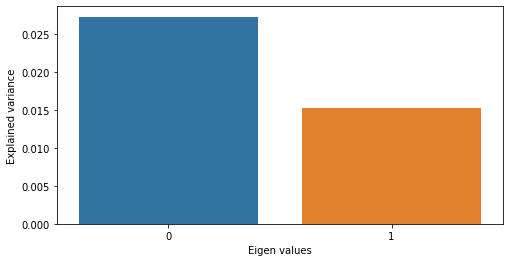

PCA on single-modal explained variance ratio: 0.042545769759704685


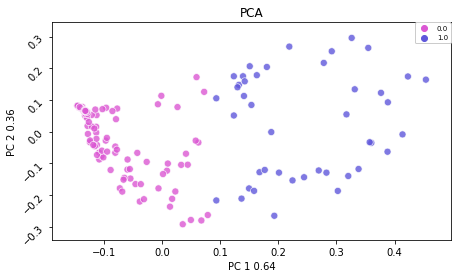

2 clusters -  silhoutte score: 0.009695764278348477 - mutual information: 0.01280585098168191
3 clusters -  silhoutte score: 0.0065681724068924405 - mutual information: 0.020644620851814836
4 clusters -  silhoutte score: 0.0059086726706967215 - mutual information: 0.028177666453905934


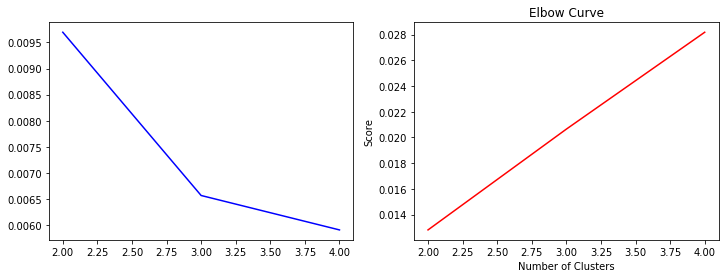

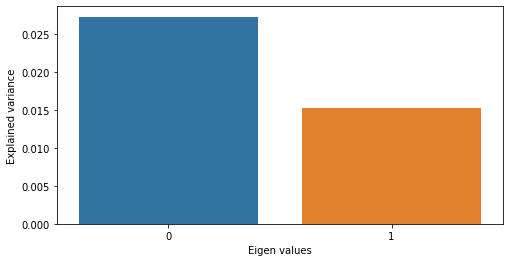

PCA on single-modal explained variance ratio: 0.042545769759704685


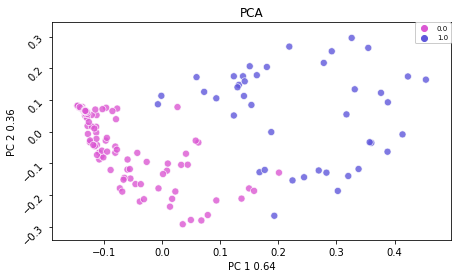

2 clusters -  silhoutte score: 0.009257102580513737 - mutual information: 0.010759637246132294
3 clusters -  silhoutte score: 0.009973216509273118 - mutual information: 0.04017835412591224
4 clusters -  silhoutte score: 0.005021880048084663 - mutual information: 0.03732520804568812


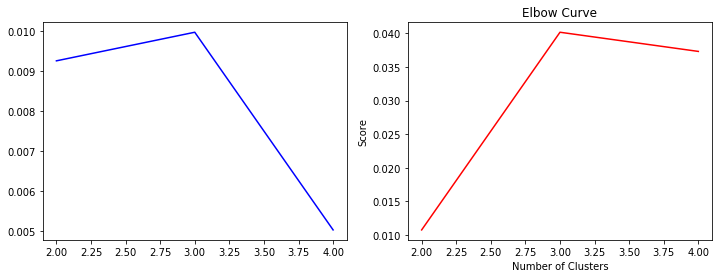

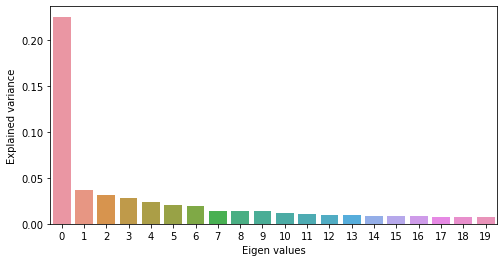

0.3657491148722624


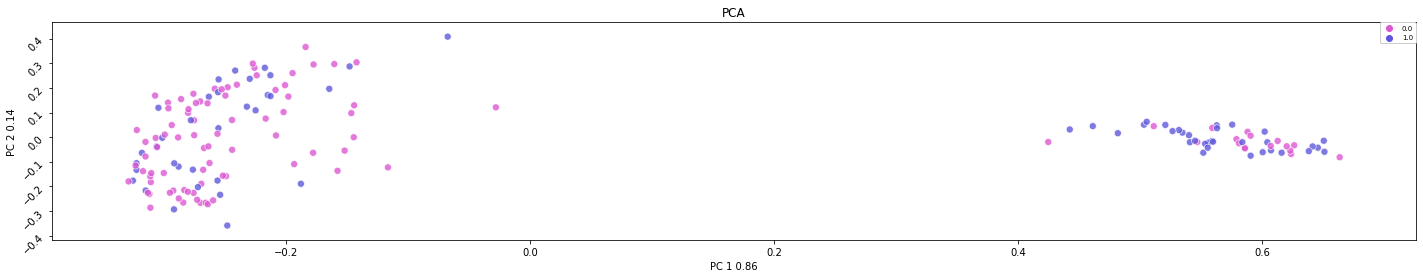

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



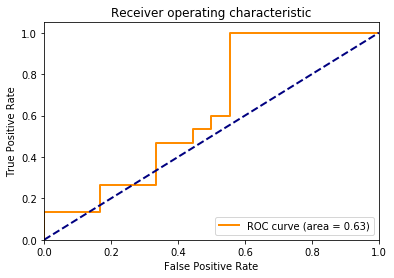

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6692307692307692 

Best C: 1.0 

Best Gamma: 0.1 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


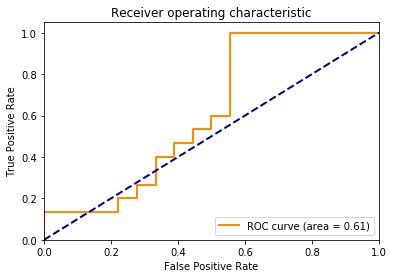

[[9 9]
 [7 8]]


              precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.47      0.53      0.50        15

    accuracy                           0.52        33
   macro avg       0.52      0.52      0.51        33
weighted avg       0.52      0.52      0.52        33

Training set score for SVM: 0.738462
Testing  set score for SVM: 0.515152
Best score for training data: 0.6846153846153846 

Best #estimators: 140 

Best max depth: None 



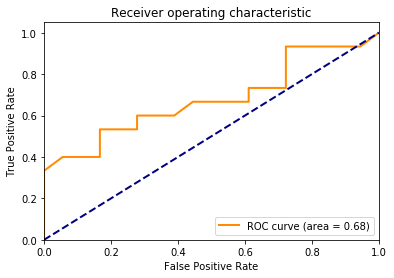

[[18  0]
 [10  5]]


              precision    recall  f1-score   support

           0       0.64      1.00      0.78        18
           1       1.00      0.33      0.50        15

    accuracy                           0.70        33
   macro avg       0.82      0.67      0.64        33
weighted avg       0.81      0.70      0.65        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.696970


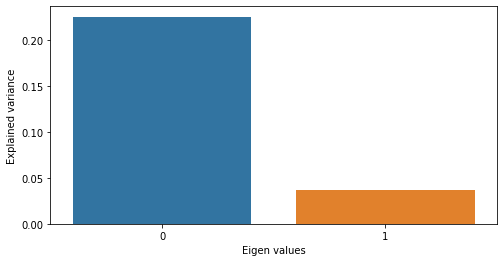

PCA on single-modal explained variance ratio: 0.26179064185151213


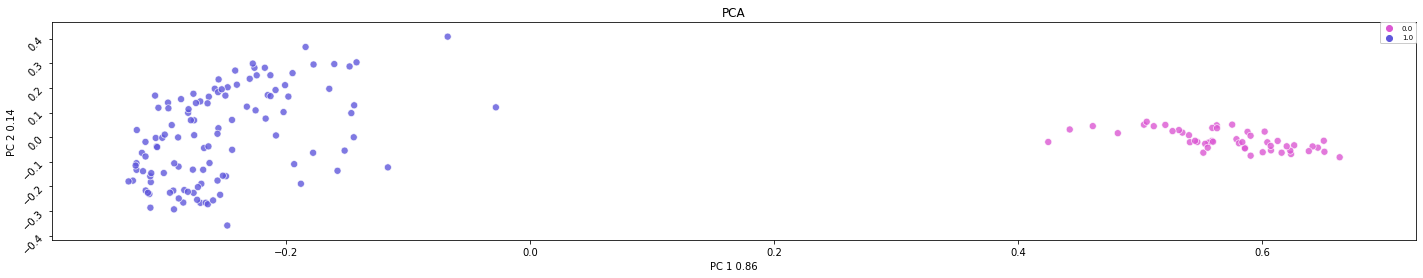

2 clusters -  silhoutte score: 0.23793552653301034 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.08393748373408043 - mutual information: 0.0675368540001129
4 clusters -  silhoutte score: 0.046732608490504986 - mutual information: 0.06055503491104931


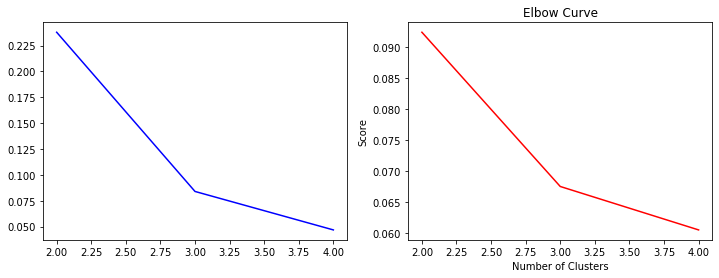

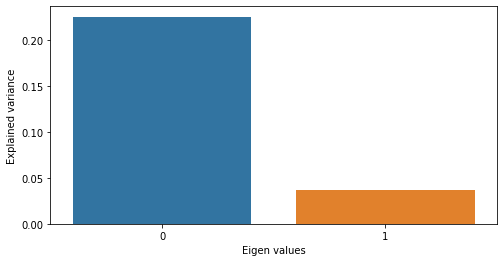

PCA on single-modal explained variance ratio: 0.26179064185151213


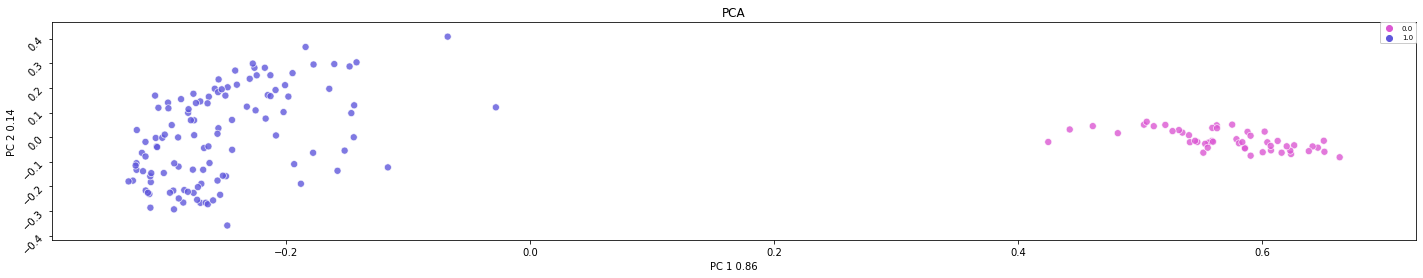

2 clusters -  silhoutte score: 0.23793552653301034 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.08465742436735298 - mutual information: 0.0675368540001129
4 clusters -  silhoutte score: 0.07607142089290844 - mutual information: 0.06637902066268006


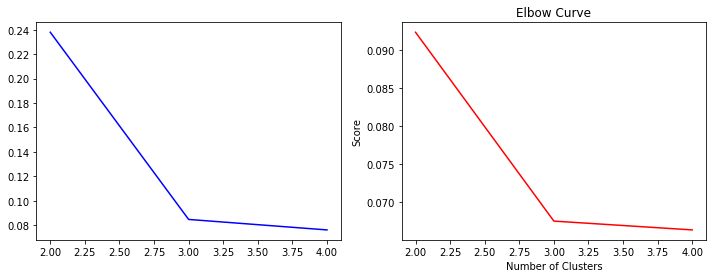

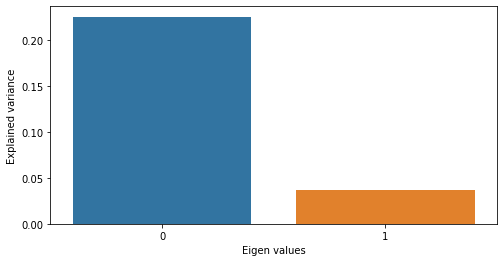

PCA on single-modal explained variance ratio: 0.26179064185151213


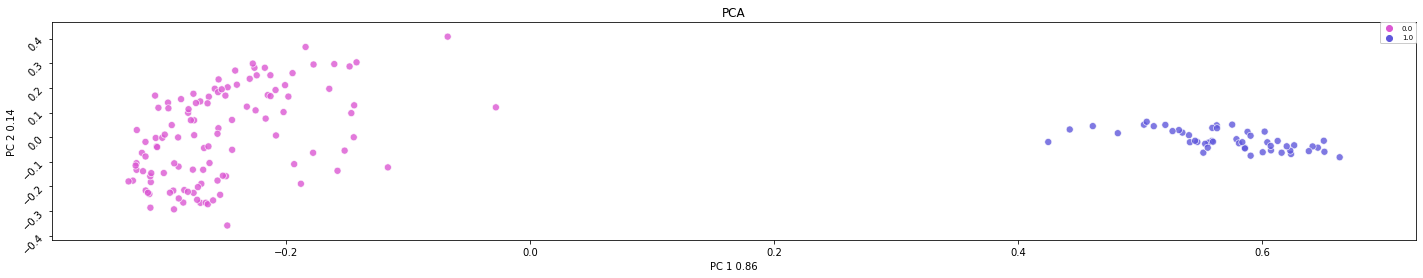

2 clusters -  silhoutte score: 0.23793552653301034 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.08235531345154451 - mutual information: 0.07145139272111553
4 clusters -  silhoutte score: 0.053688941786917126 - mutual information: 0.07670452408969589


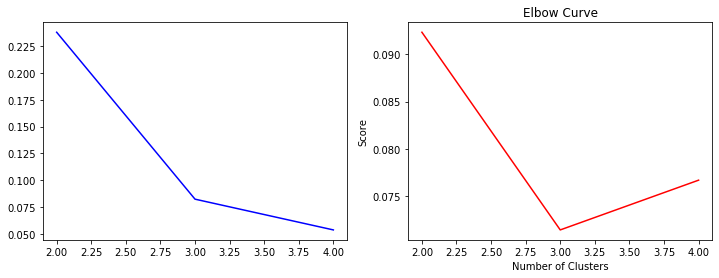

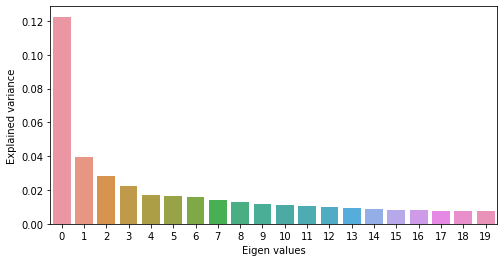

0.24656420570740456


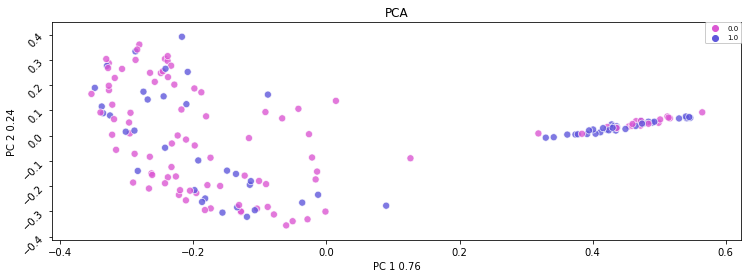

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



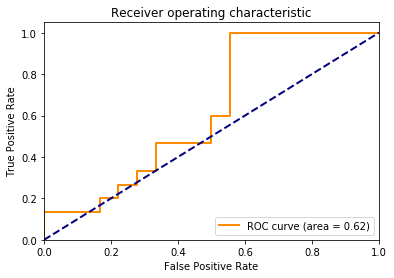

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.623076923076923 

Best C: 1.0 

Best Gamma: 0.1 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


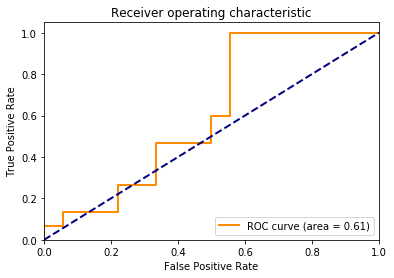

[[14  4]
 [13  2]]


              precision    recall  f1-score   support

           0       0.52      0.78      0.62        18
           1       0.33      0.13      0.19        15

    accuracy                           0.48        33
   macro avg       0.43      0.46      0.41        33
weighted avg       0.43      0.48      0.43        33

Training set score for SVM: 0.784615
Testing  set score for SVM: 0.484848
Best score for training data: 0.676923076923077 

Best #estimators: 140 

Best max depth: None 



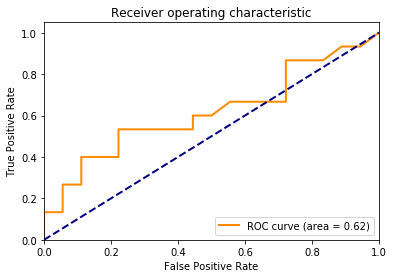

[[16  2]
 [ 9  6]]


              precision    recall  f1-score   support

           0       0.64      0.89      0.74        18
           1       0.75      0.40      0.52        15

    accuracy                           0.67        33
   macro avg       0.70      0.64      0.63        33
weighted avg       0.69      0.67      0.64        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.666667


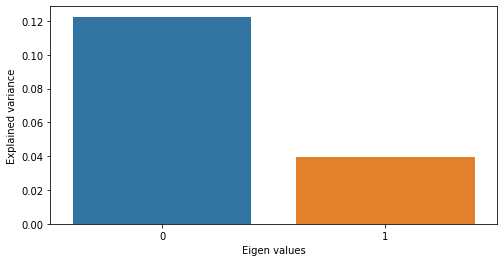

PCA on single-modal explained variance ratio: 0.1621359848335551


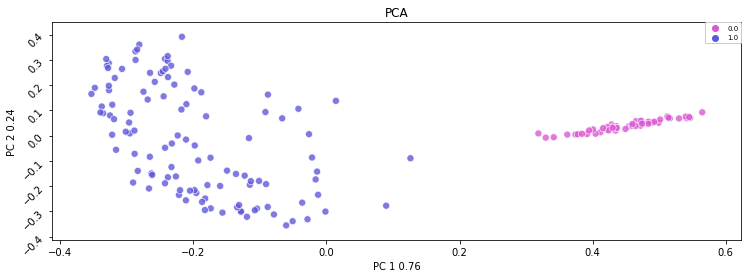

2 clusters -  silhoutte score: 0.13503981774011653 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.05416871578541587 - mutual information: 0.06781963389188511
4 clusters -  silhoutte score: 0.053633882070596675 - mutual information: 0.0801753767786879


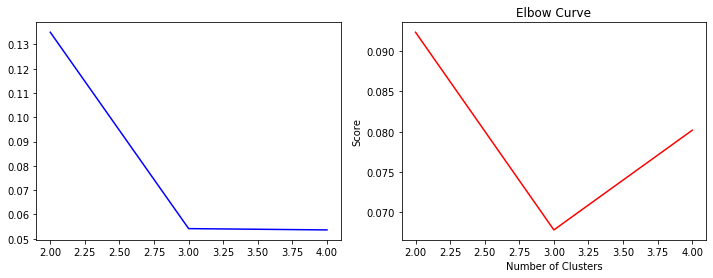

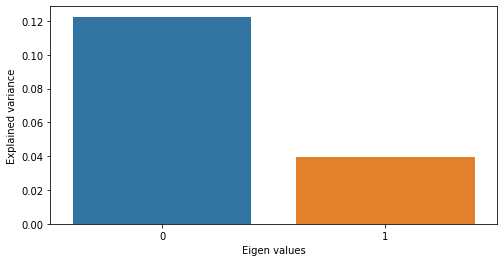

PCA on single-modal explained variance ratio: 0.1621359848335551


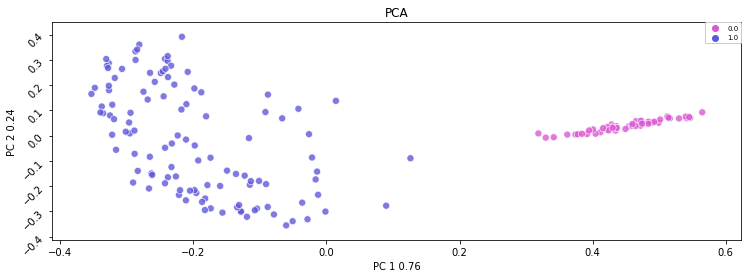

2 clusters -  silhoutte score: 0.13503981774011653 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.05346290642611686 - mutual information: 0.06750121675589844
4 clusters -  silhoutte score: 0.04704989778851905 - mutual information: 0.06269148566931876


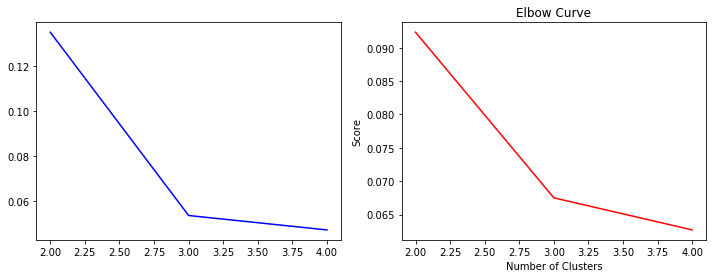

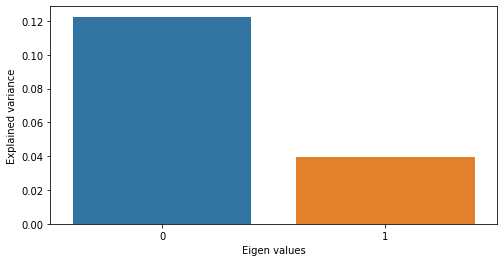

PCA on single-modal explained variance ratio: 0.1621359848335551


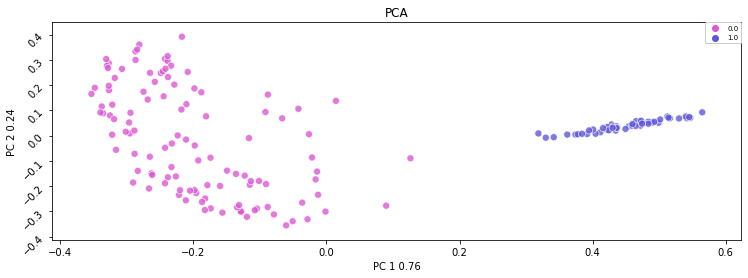

2 clusters -  silhoutte score: 0.13503981774011653 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.040938993261691425 - mutual information: 0.06869883379470922
4 clusters -  silhoutte score: 0.04241191881458883 - mutual information: 0.0739098574090909


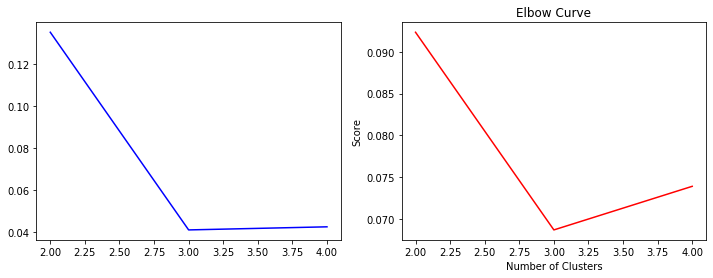

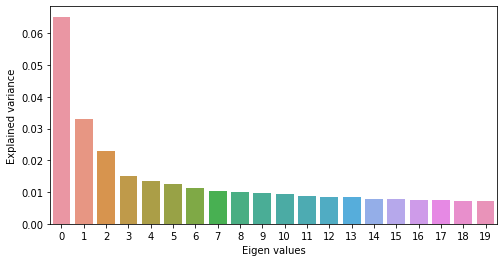

0.16196642493416016


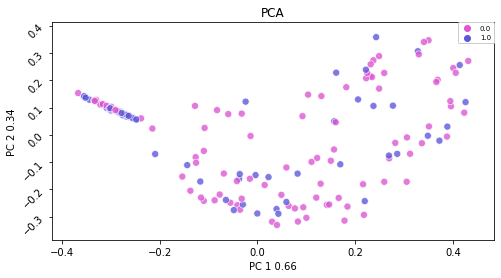

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



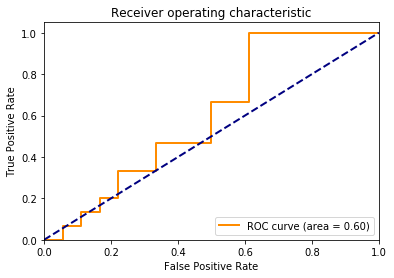

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


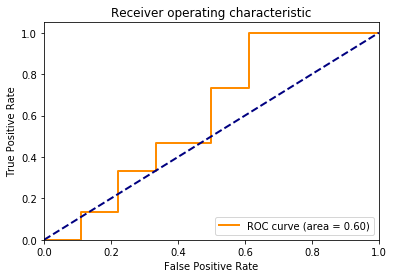

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.7 

Best #estimators: 100 

Best max depth: 12 



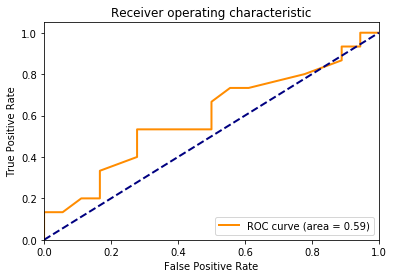

[[15  3]
 [11  4]]


              precision    recall  f1-score   support

           0       0.58      0.83      0.68        18
           1       0.57      0.27      0.36        15

    accuracy                           0.58        33
   macro avg       0.57      0.55      0.52        33
weighted avg       0.57      0.58      0.54        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.575758


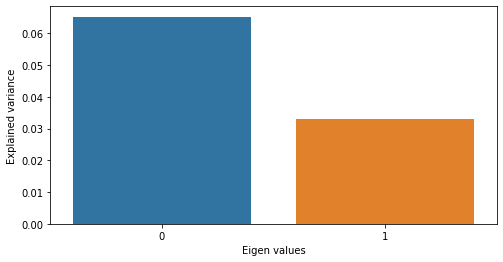

PCA on single-modal explained variance ratio: 0.09820946383982174


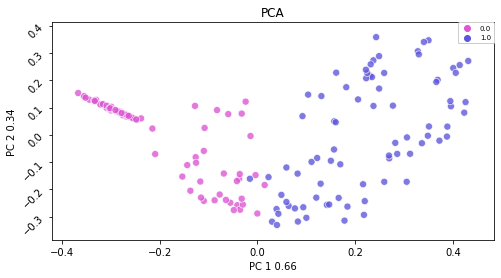

2 clusters -  silhoutte score: 0.04531384173509304 - mutual information: 0.046280397501915586
3 clusters -  silhoutte score: 0.030183175508300582 - mutual information: 0.05864309296191621
4 clusters -  silhoutte score: 0.022597268202892908 - mutual information: 0.05640302252570724


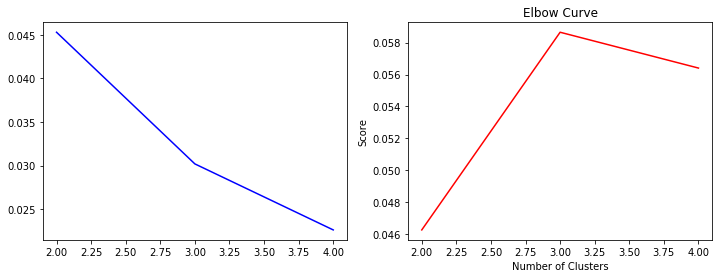

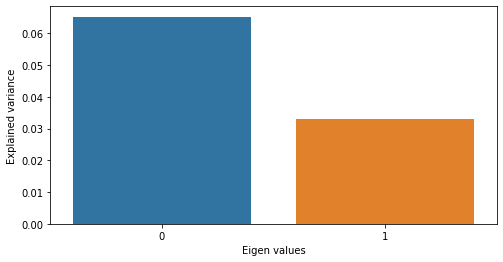

PCA on single-modal explained variance ratio: 0.09820946383982174


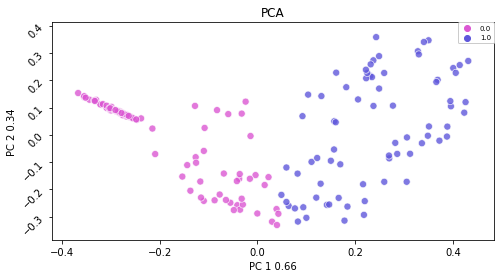

2 clusters -  silhoutte score: 0.04172941607070989 - mutual information: 0.052844666325224
3 clusters -  silhoutte score: 0.02847990287309827 - mutual information: 0.051273438419425
4 clusters -  silhoutte score: 0.023944025341711368 - mutual information: 0.04421005920453384


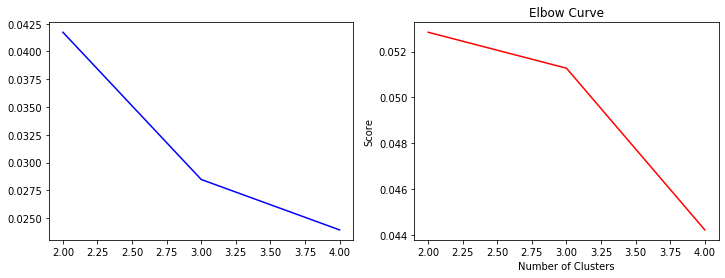

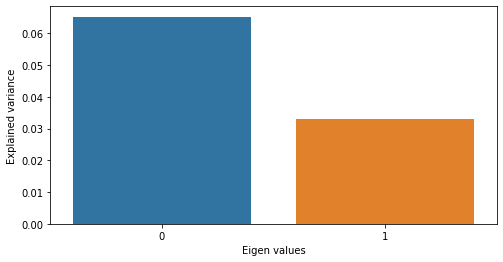

PCA on single-modal explained variance ratio: 0.09820946383982174


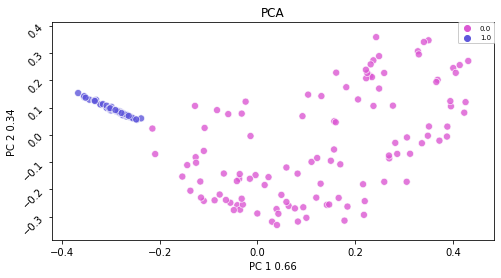

2 clusters -  silhoutte score: 0.061348690159457306 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.032636922999529396 - mutual information: 0.06736371992757978
4 clusters -  silhoutte score: 0.019492992139812076 - mutual information: 0.061512082179111485


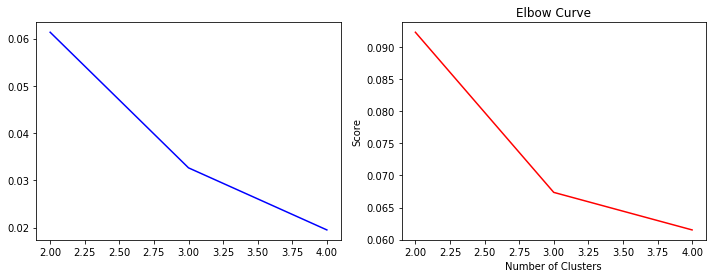

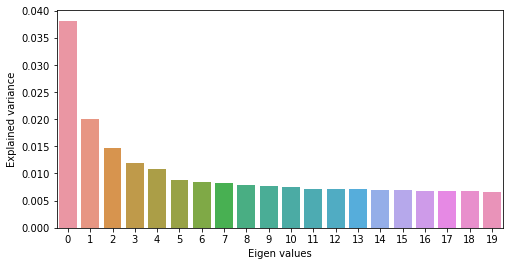

0.10421244900302341


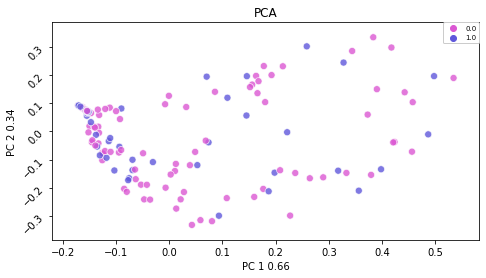

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



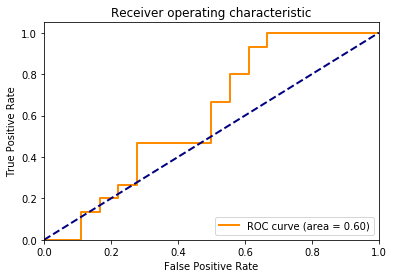

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


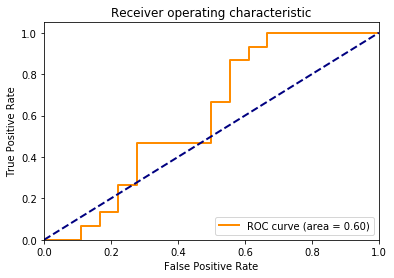

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.7230769230769231 

Best #estimators: 100 

Best max depth: 12 



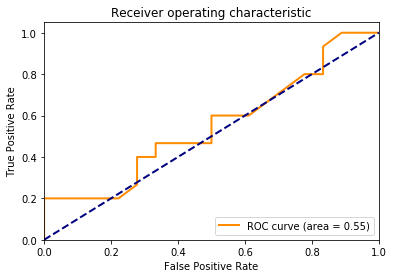

[[14  4]
 [12  3]]


              precision    recall  f1-score   support

           0       0.54      0.78      0.64        18
           1       0.43      0.20      0.27        15

    accuracy                           0.52        33
   macro avg       0.48      0.49      0.45        33
weighted avg       0.49      0.52      0.47        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152


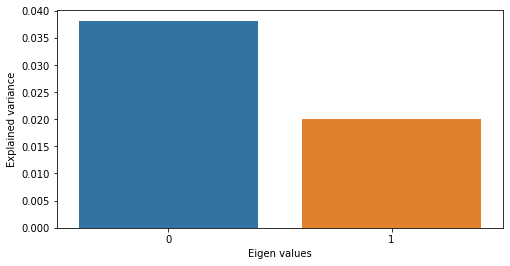

PCA on single-modal explained variance ratio: 0.058067387270338305


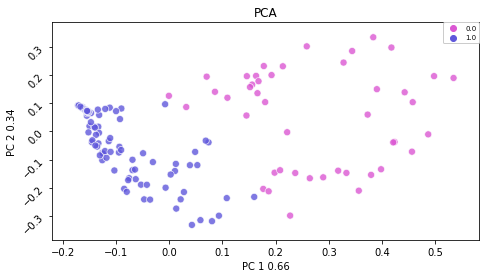

2 clusters -  silhoutte score: 0.016022609004465664 - mutual information: 0.01124732445984654
3 clusters -  silhoutte score: 0.011386396512270264 - mutual information: 0.035394802144017516
4 clusters -  silhoutte score: 0.003635851068632937 - mutual information: 0.03609309642898712


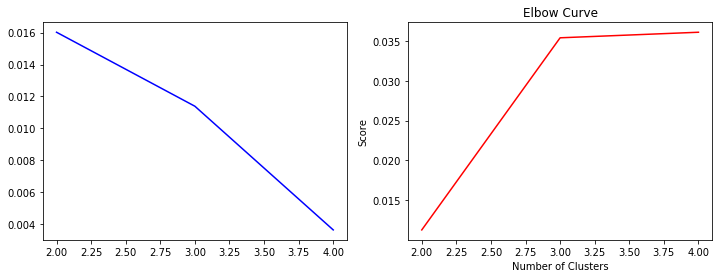

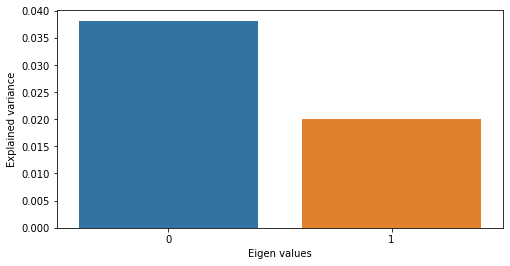

PCA on single-modal explained variance ratio: 0.058067387270338305


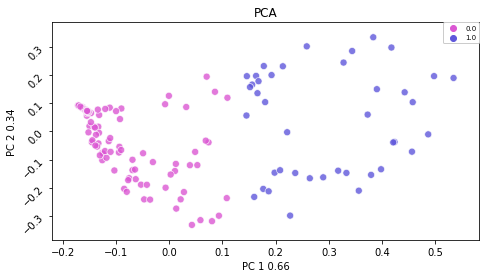

2 clusters -  silhoutte score: 0.014405226945594663 - mutual information: 0.014579787379209376
3 clusters -  silhoutte score: 0.008753232520143046 - mutual information: 0.028684061932283542
4 clusters -  silhoutte score: 0.008405628918659766 - mutual information: 0.025264860235103333


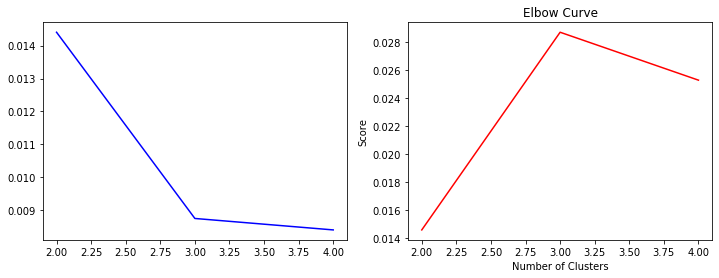

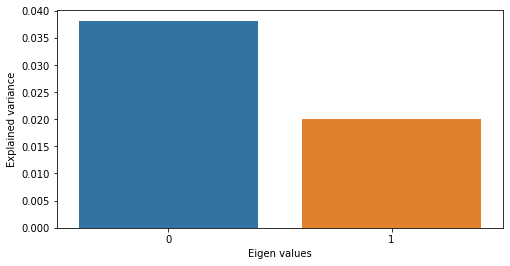

PCA on single-modal explained variance ratio: 0.058067387270338305


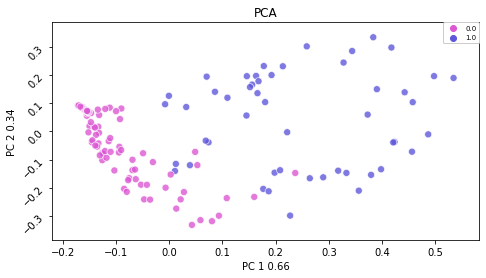

2 clusters -  silhoutte score: 0.01633057066624505 - mutual information: 0.0160046180669396
3 clusters -  silhoutte score: 0.017237586191255688 - mutual information: 0.0422182997475331
4 clusters -  silhoutte score: 0.007322724046126376 - mutual information: 0.03797287522656087


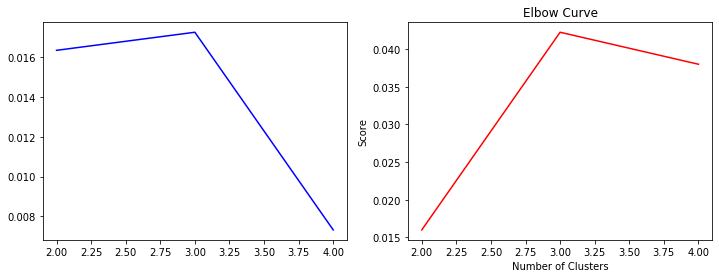

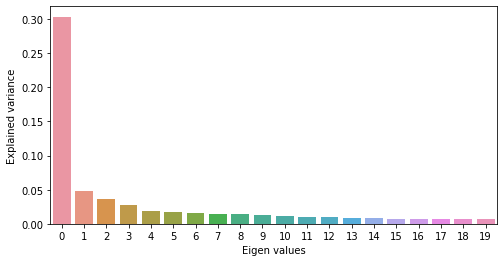

0.44947985806466795


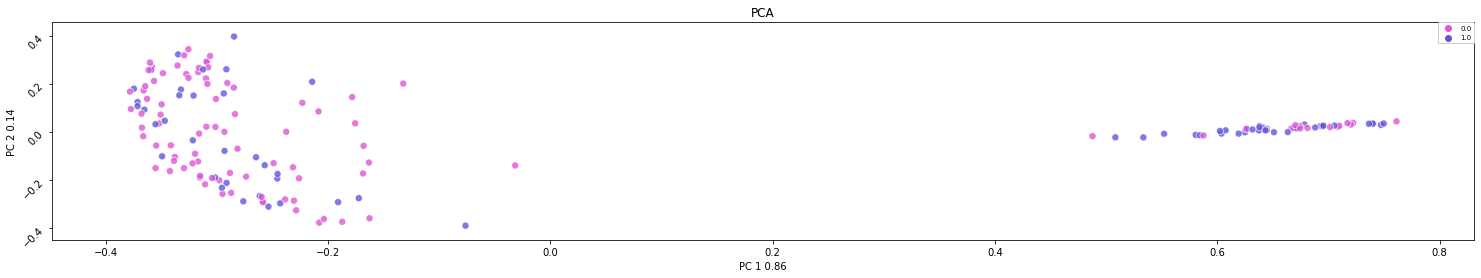

Results for AE: 

Best score for training data: 0.623076923076923 

Best C: 0.08 



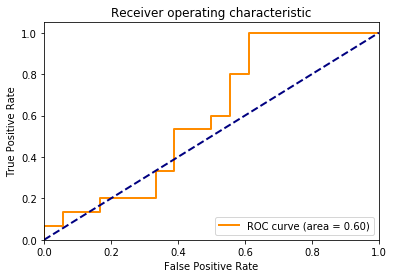

[[15  3]
 [12  3]]


              precision    recall  f1-score   support

           0       0.56      0.83      0.67        18
           1       0.50      0.20      0.29        15

    accuracy                           0.55        33
   macro avg       0.53      0.52      0.48        33
weighted avg       0.53      0.55      0.49        33

Training set score for Logistic Regression: 0.715385
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.7230769230769231 

Best C: 1.0 

Best Gamma: 0.1 



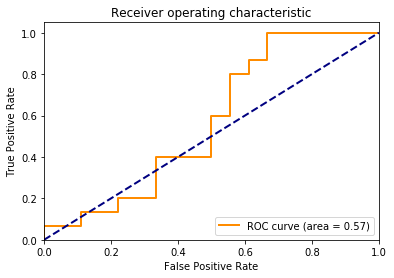

[[9 9]
 [7 8]]


              precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.47      0.53      0.50        15

    accuracy                           0.52        33
   macro avg       0.52      0.52      0.51        33
weighted avg       0.52      0.52      0.52        33

Training set score for SVM: 0.738462
Testing  set score for SVM: 0.515152
Best score for training data: 0.7076923076923076 

Best #estimators: 140 

Best max depth: None 



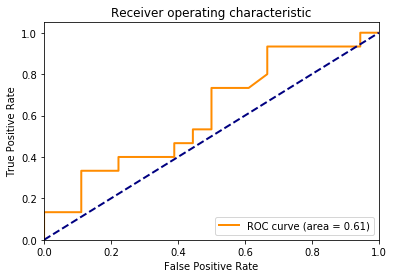

[[12  6]
 [ 9  6]]


              precision    recall  f1-score   support

           0       0.57      0.67      0.62        18
           1       0.50      0.40      0.44        15

    accuracy                           0.55        33
   macro avg       0.54      0.53      0.53        33
weighted avg       0.54      0.55      0.54        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.545455


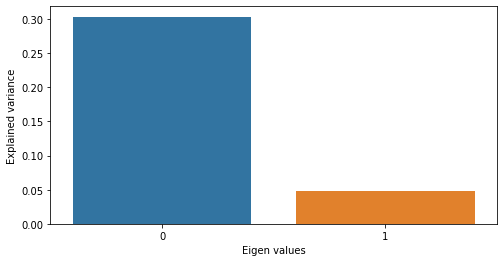

PCA on single-modal explained variance ratio: 0.35104344034438834


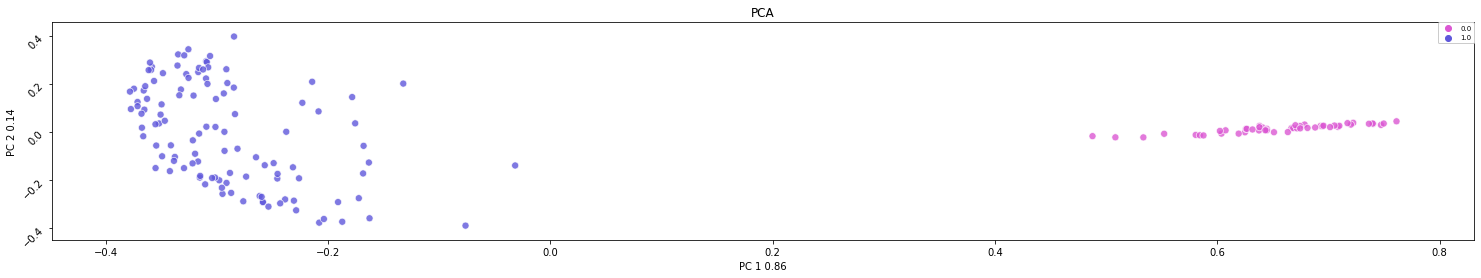

2 clusters -  silhoutte score: 0.3099815428467224 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.11874958959663484 - mutual information: 0.06729995130774101
4 clusters -  silhoutte score: 0.07343184790162234 - mutual information: 0.060867556942945315


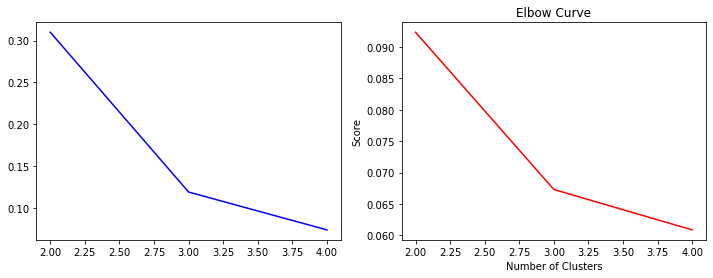

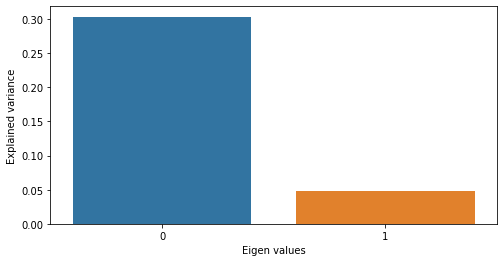

PCA on single-modal explained variance ratio: 0.35104344034438834


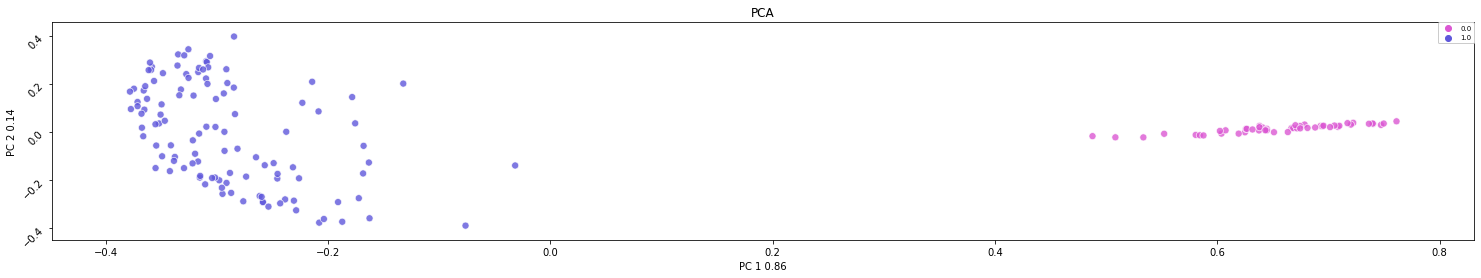

2 clusters -  silhoutte score: 0.3099815428467224 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.11859421310949919 - mutual information: 0.06729995130774101
4 clusters -  silhoutte score: 0.1098998749270598 - mutual information: 0.06049866797388226


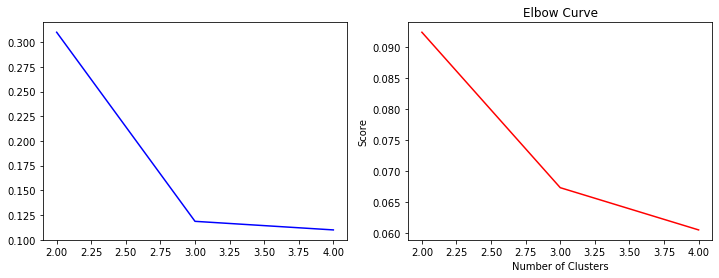

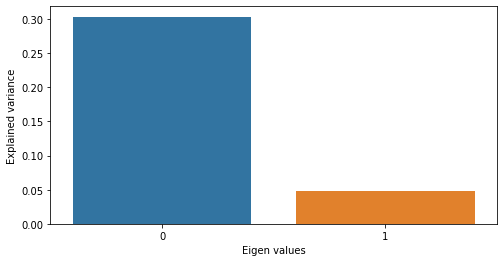

PCA on single-modal explained variance ratio: 0.35104344034438834


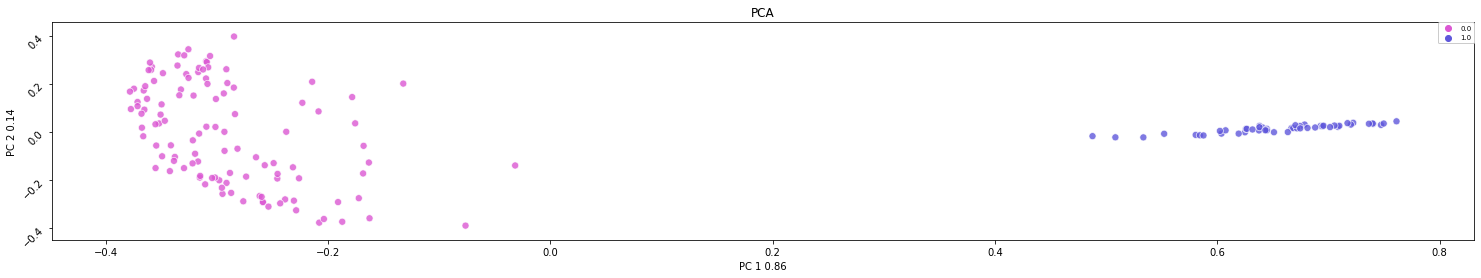

2 clusters -  silhoutte score: 0.3099815428467224 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.11913018174154613 - mutual information: 0.06814576388487074
4 clusters -  silhoutte score: 0.0715732521801216 - mutual information: 0.06299280114647372


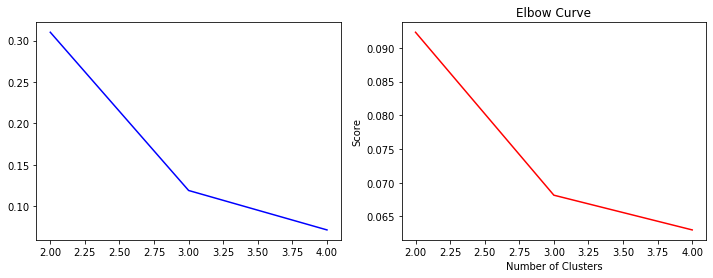

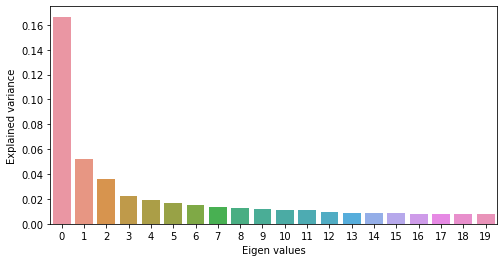

0.31282400718206893


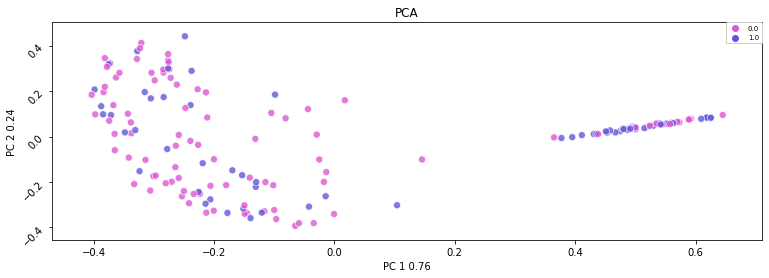

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



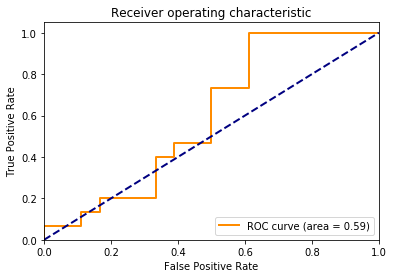

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6692307692307692 

Best C: 1.0 

Best Gamma: 0.1 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


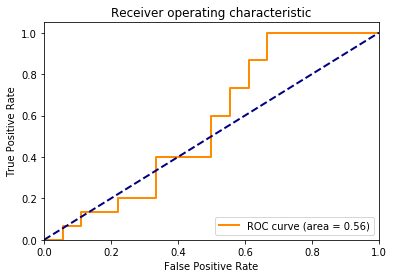

[[9 9]
 [7 8]]


              precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.47      0.53      0.50        15

    accuracy                           0.52        33
   macro avg       0.52      0.52      0.51        33
weighted avg       0.52      0.52      0.52        33

Training set score for SVM: 0.753846
Testing  set score for SVM: 0.515152
Best score for training data: 0.7 

Best #estimators: 140 

Best max depth: None 



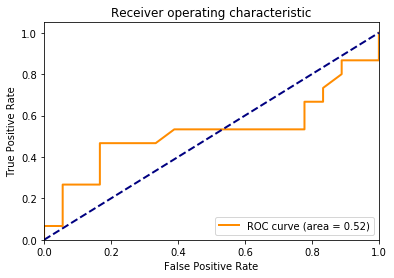

[[15  3]
 [ 8  7]]


              precision    recall  f1-score   support

           0       0.65      0.83      0.73        18
           1       0.70      0.47      0.56        15

    accuracy                           0.67        33
   macro avg       0.68      0.65      0.65        33
weighted avg       0.67      0.67      0.65        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.666667


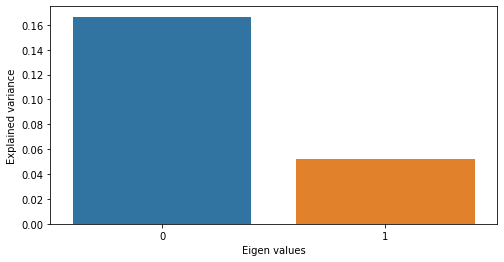

PCA on single-modal explained variance ratio: 0.21890836854841256


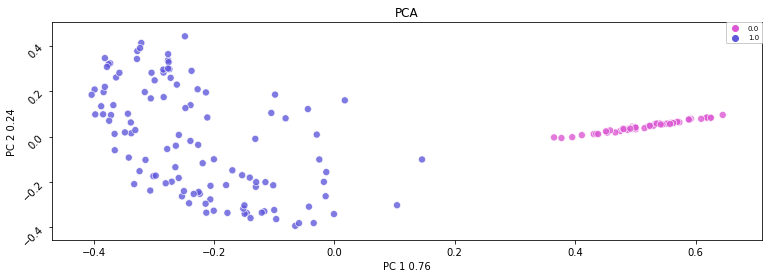

2 clusters -  silhoutte score: 0.1817299526105476 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.07814044915284339 - mutual information: 0.06781963389188511
4 clusters -  silhoutte score: 0.0783241729347179 - mutual information: 0.07521240433901669


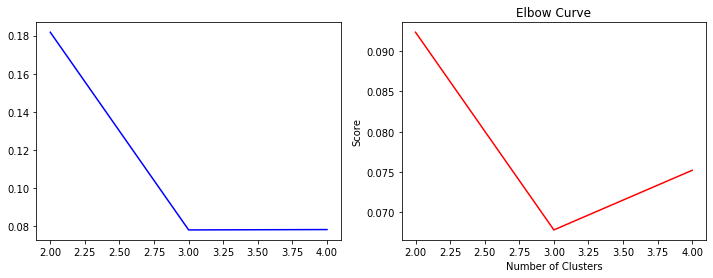

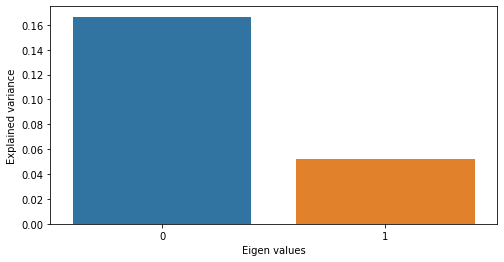

PCA on single-modal explained variance ratio: 0.21890836854841256


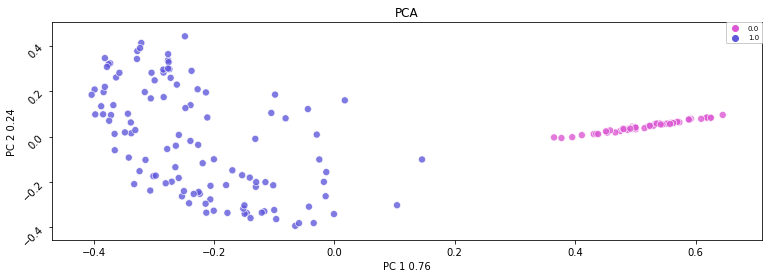

2 clusters -  silhoutte score: 0.1817299526105476 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.07721700581803266 - mutual information: 0.06750121675589844
4 clusters -  silhoutte score: 0.0674395121588145 - mutual information: 0.06090684963760991


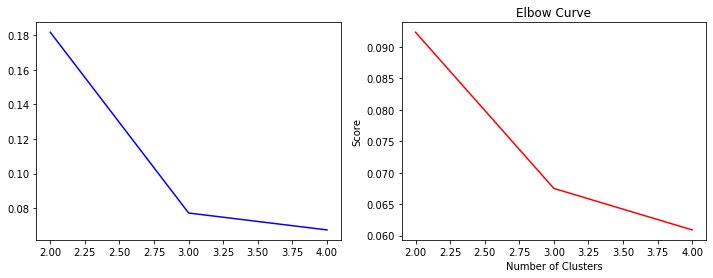

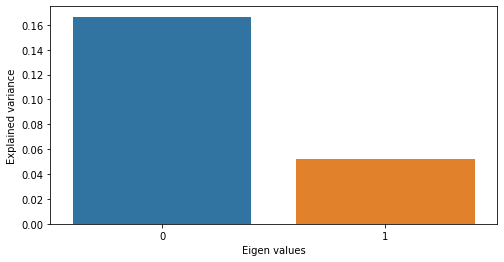

PCA on single-modal explained variance ratio: 0.21890836854841256


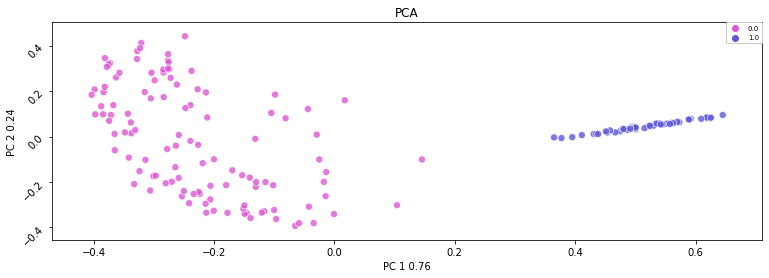

2 clusters -  silhoutte score: 0.1817299526105476 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.07719126049539278 - mutual information: 0.06729995130774101
4 clusters -  silhoutte score: 0.06109513163374526 - mutual information: 0.0616620770045695


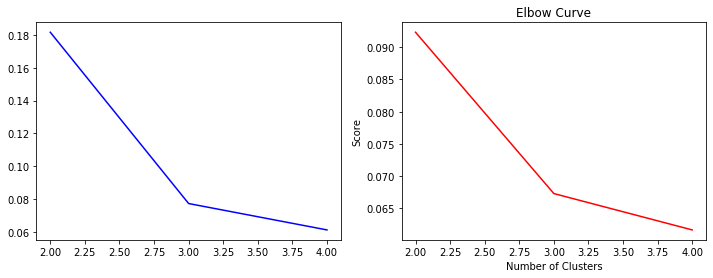

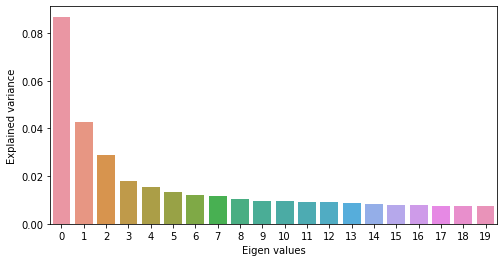

0.20510533832573963


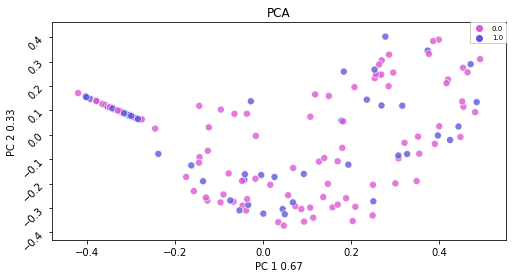

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



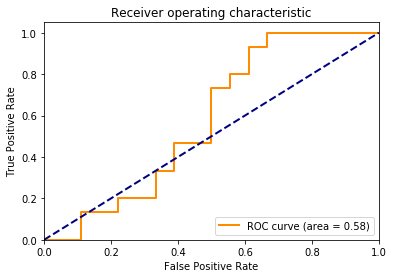

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


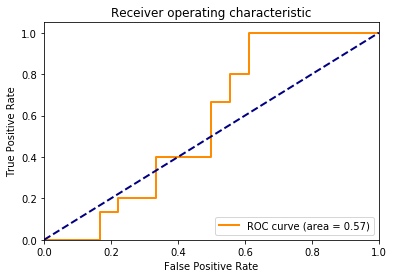

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.7153846153846153 

Best #estimators: 140 

Best max depth: None 



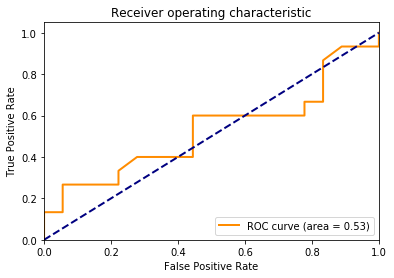

[[12  6]
 [ 9  6]]


              precision    recall  f1-score   support

           0       0.57      0.67      0.62        18
           1       0.50      0.40      0.44        15

    accuracy                           0.55        33
   macro avg       0.54      0.53      0.53        33
weighted avg       0.54      0.55      0.54        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.545455


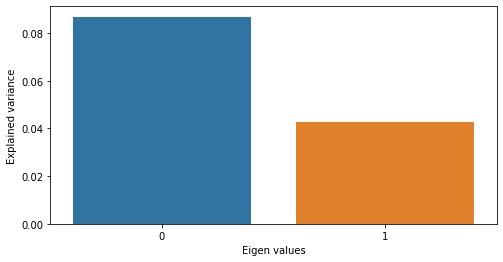

PCA on single-modal explained variance ratio: 0.12963160043919508


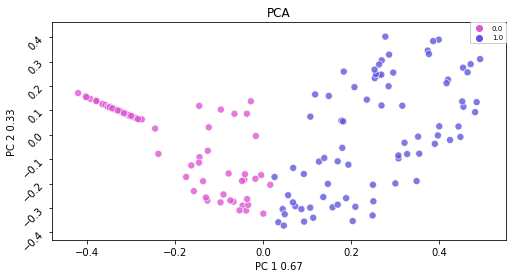

2 clusters -  silhoutte score: 0.06210920894908956 - mutual information: 0.04264655451646867
3 clusters -  silhoutte score: 0.04480819268677767 - mutual information: 0.051140250812514845
4 clusters -  silhoutte score: 0.026699993224326077 - mutual information: 0.05319049372235756


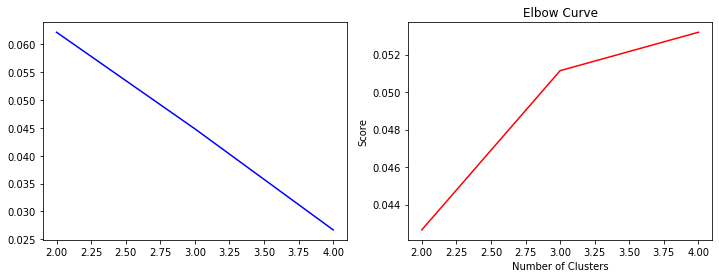

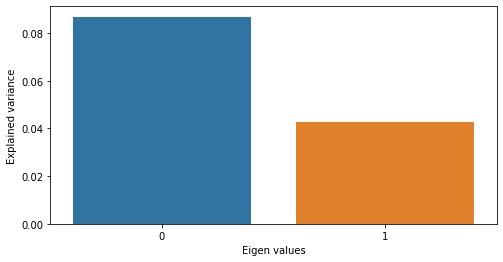

PCA on single-modal explained variance ratio: 0.12963160043919508


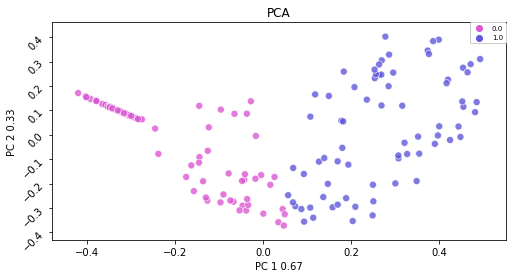

2 clusters -  silhoutte score: 0.057980315341175884 - mutual information: 0.052844666325224
3 clusters -  silhoutte score: 0.040862787509626554 - mutual information: 0.051273438419425
4 clusters -  silhoutte score: 0.03457235985031908 - mutual information: 0.044210059204533844


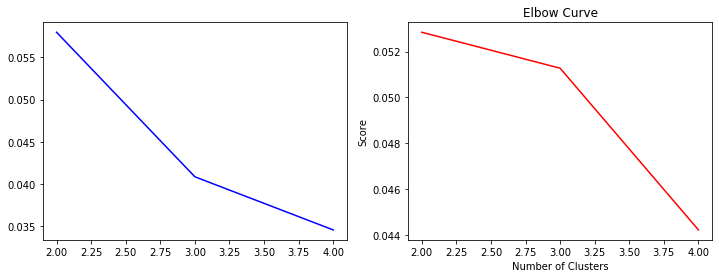

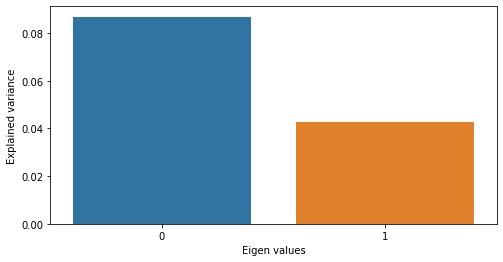

PCA on single-modal explained variance ratio: 0.12963160043919508


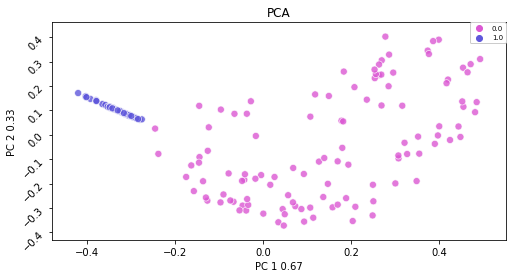

2 clusters -  silhoutte score: 0.08326560583610601 - mutual information: 0.09232566564717984
3 clusters -  silhoutte score: 0.04630129482656864 - mutual information: 0.0675368540001129
4 clusters -  silhoutte score: 0.028473295129242 - mutual information: 0.061259860214262135


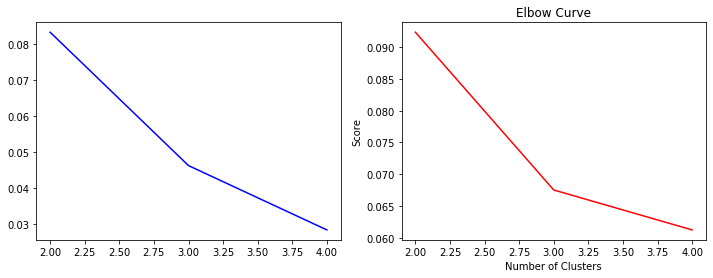

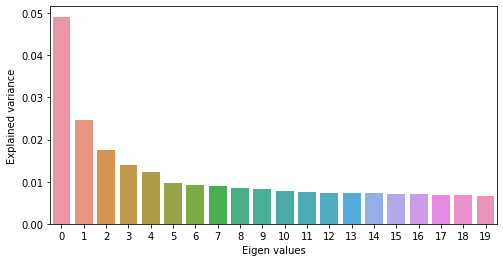

0.12739990218727076


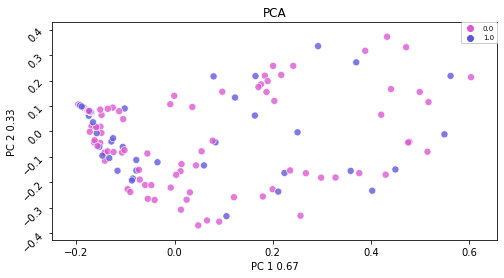

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



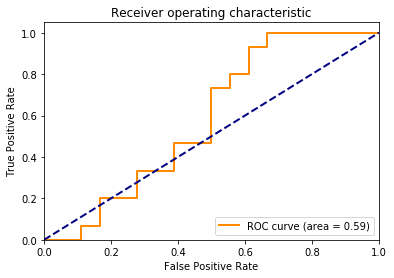

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for Logistic Regression: 0.607692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6076923076923076 

Best C: 0.1 

Best Gamma: scale 



F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


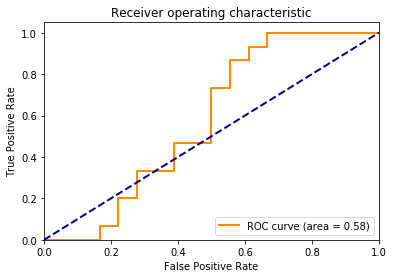

[[18  0]
 [15  0]]


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33

Training set score for SVM: 0.607692
Testing  set score for SVM: 0.545455


F:\Documentacion\Desarrollo\Python\Anaconda\envs\tf_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.7384615384615383 

Best #estimators: 140 

Best max depth: None 



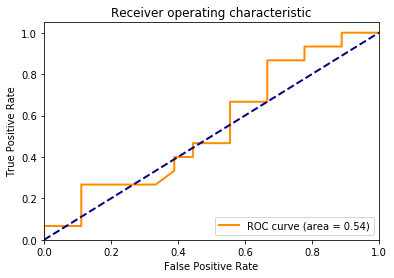

[[11  7]
 [10  5]]


              precision    recall  f1-score   support

           0       0.52      0.61      0.56        18
           1       0.42      0.33      0.37        15

    accuracy                           0.48        33
   macro avg       0.47      0.47      0.47        33
weighted avg       0.48      0.48      0.48        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.484848


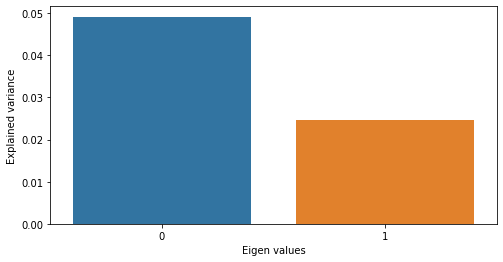

PCA on single-modal explained variance ratio: 0.07386557582908895


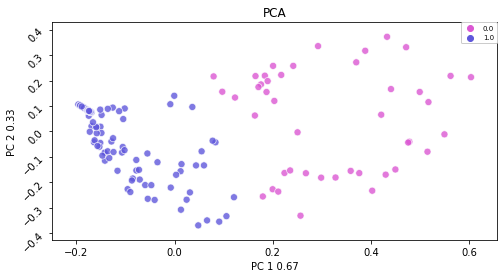

2 clusters -  silhoutte score: 0.02182213256504126 - mutual information: 0.009351237802574314
3 clusters -  silhoutte score: 0.02415336727014765 - mutual information: 0.04301221585495026
4 clusters -  silhoutte score: 0.010826658565688822 - mutual information: 0.031039593521997772


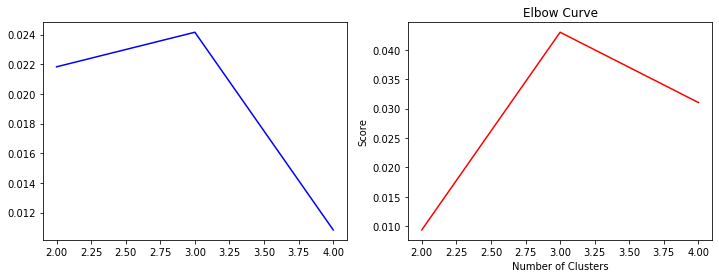

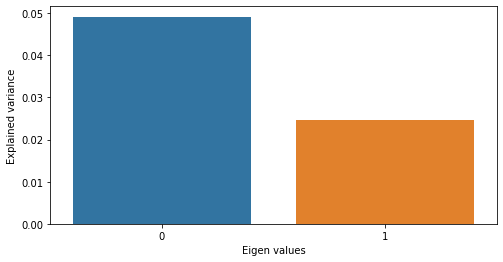

PCA on single-modal explained variance ratio: 0.07386557582908895


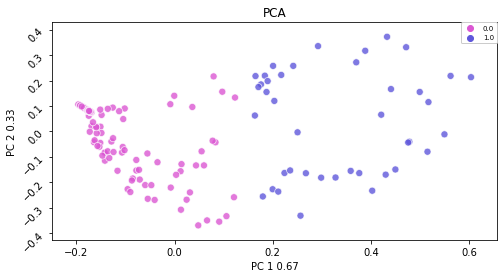

2 clusters -  silhoutte score: 0.01997935138243401 - mutual information: 0.014579787379209376
3 clusters -  silhoutte score: 0.010379701799497987 - mutual information: 0.04067897969345382
4 clusters -  silhoutte score: 0.006622587618366533 - mutual information: 0.039971862536607346


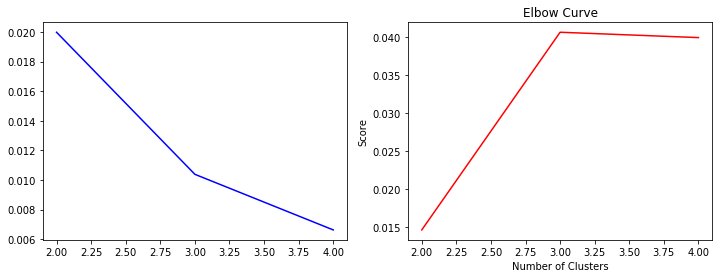

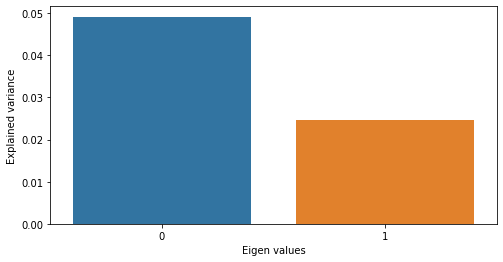

PCA on single-modal explained variance ratio: 0.07386557582908895


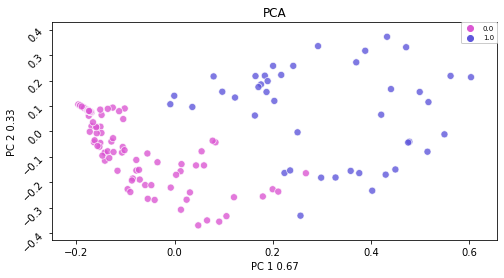

2 clusters -  silhoutte score: 0.020229924206804552 - mutual information: 0.01280585098168191
3 clusters -  silhoutte score: 0.021866574140646584 - mutual information: 0.04725763567492615
4 clusters -  silhoutte score: 0.013052818032121154 - mutual information: 0.04406711552330765


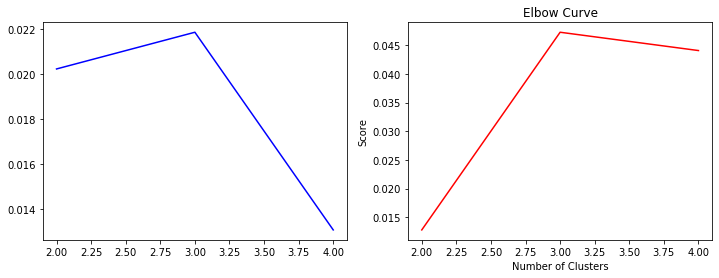

In [3]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# CONCAT TRAIN AND TEST DATASET TO TRANSFORM THE ENTIRE DATA
X_first = pd.concat([X_train_first_norm, X_test_first_norm], axis=0)
X_second = pd.concat([X_train_second_norm, X_test_second_norm], axis=0)
y = pd.concat([y_train, y_test], axis=0)

# Hyperparameters
gammas = [2**x/500 if x < 5 else round(2**x/100) for x in range(1,5)]
mus = [x/5 for x in range(1,5)]

results=[]

for mu in mus:
    for gamma in gammas:
        # Apply rbf kernel to divided datasets
        X_kpca, _ = Models.perform_multi_KPCA(X_first, X_second, y, gamma=gamma, mu=mu)

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_kpca, y, test_size=0.2, random_state=1) 
        ### CLASSIFICATION ###
        classify = Models.classify(X_train, X_test, np.ravel(y_train), np.ravel(y_test), model_type="KPCA")

        ### CLUSTERING ###
        clustering = Models.cluster(X_kpca,np.ravel(y), model_type="KPCA")
        
        results.append([mu,gamma] + classify + clustering)

In [4]:
scores = pd.DataFrame(results,
                     columns=["mu","gamma","LR_accuracy","SVM_accuracy", "RF_accuracy", "LR_auc", "SVM_auc", "RF_auc","kmeans_silhouette","kmeans_mutual_info","spectral_silhouette","spectral_mutual_info","hierarchical_silhouette","hierarchical_mutual_info"])    
scores

mu  gamma  LR_accuracy  SVM_accuracy  RF_accuracy    LR_auc   SVM_auc  \
0   0.2  0.004     0.545455      0.545455     0.636364  0.651852  0.655556   
1   0.2  0.008     0.545455      0.545455     0.666667  0.655556  0.640741   
2   0.2  0.016     0.545455      0.545455     0.606061  0.662963  0.640741   
3   0.2  0.032     0.545455      0.545455     0.636364  0.670370  0.666667   
4   0.4  0.004     0.545455      0.515152     0.636364  0.659259  0.618519   
5   0.4  0.008     0.545455      0.545455     0.636364  0.651852  0.625926   
6   0.4  0.016     0.545455      0.545455     0.575758  0.637037  0.629630   
7   0.4  0.032     0.545455      0.545455     0.636364  0.629630  0.625926   
8   0.6  0.004     0.545455      0.515152     0.696970  0.625926  0.611111   
9   0.6  0.008     0.545455      0.484848     0.666667  0.622222  0.611111   
10  0.6  0.016     0.545455      0.545455     0.575758  0.600000  0.600000   
11  0.6  0.032     0.545455      0.545455     0.515152  0.603704  0.600000   
12  0.8  0.004     0.545455      0.515152     0.545455  0.596296  0.570370   
13  0.8  0.008     0.545455      0.515152     0.666667  0.592593  0.562963   
14  0.8  0.016     0.545455      0.545455     0.545455  0.577778  0.566667   
15  0.8  0.032     0.545455      0.545455     0.484848  0.585185  0.577778   

      RF_auc  kmeans_silhouette  kmeans_mutual_info  spectral_silhouette  \
0   0.624074           0.086449            0.086449             0.070697   
1   0.537037           0.045011            0.039580             0.032742   
2   0.737037           0.018001            0.013902             0.011459   
3   0.572222           0.003684            0.004634             0.004426   
4   0.594444           0.164215            0.164215             0.164215   
5   0.687037           0.089683            0.089683             0.089683   
6   0.637037           0.032056            0.028864             0.037164   
7   0.550000           0.010908            0.009696             0.009257   
8   0.679630           0.237936            0.237936             0.237936   
9   0.616667           0.135040            0.135040             0.135040   
10  0.594444           0.045314            0.041729             0.061349   
11  0.550000           0.016023            0.014405             0.016331   
12  0.612963           0.309982            0.309982             0.309982   
13  0.522222           0.181730            0.181730             0.181730   
14  0.529630           0.062109            0.057980             0.083266   
15  0.542593           0.021822            0.019979             0.020230   

    spectral_mutual_info  hierarchical_silhouette  hierarchical_mutual_info  
0               0.068254                 0.125738                  0.052135  
1               0.050971                 0.125960                  0.098433  
2               0.019266                 0.057718                  0.024791  
3               0.026246                 0.031251                  0.029105  
4               0.071339                 0.120520                  0.113504  
5               0.069110                 0.072907                  0.089728  
6               0.062818                 0.055217                  0.044334  
7               0.039674                 0.028178                  0.037325  
8               0.060555                 0.066379                  0.076705  
9               0.080175                 0.062691                  0.073910  
10              0.056403                 0.044210                  0.061512  
11              0.036093                 0.025265                  0.037973  
12              0.060868                 0.060499                  0.062993  
13              0.075212                 0.060907                  0.061662  
14              0.053190                 0.044210                  0.061260  
15              0.031040                 0.039972                  0.044067

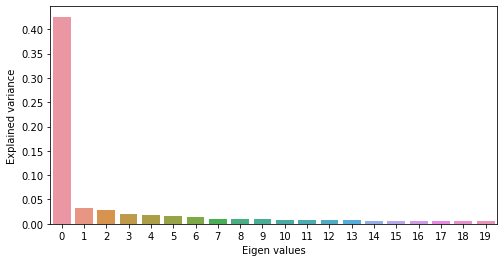

0.5413342323582516


(array([-0.2, -0.1,  0. ,  0.1,  0.2,  0.3]),
 <a list of 6 Text yticklabel objects>)

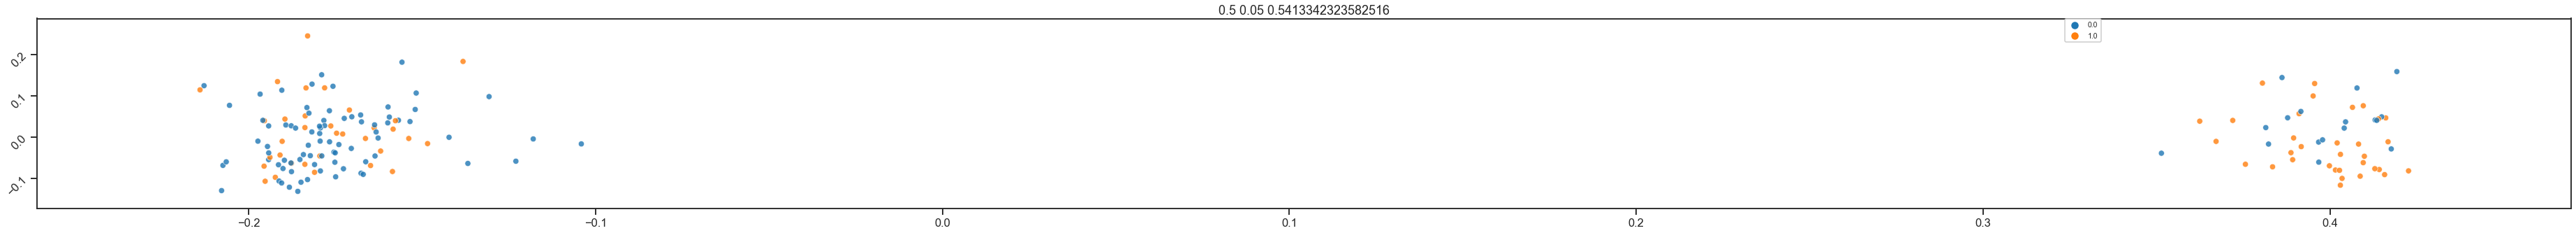

In [5]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, sigmoid_kernel, laplacian_kernel
gamma = 0.05
degree = 4 
mu = 0.5
num_labels = y.nunique()[0]
# Apply rbf kernel to divided datasets
K1 = rbf_kernel(X=X_first)
K2 = laplacian_kernel(X=X_second)

Ktot = mu*K1 + (1-mu)*K2

# Use Ktot to perform KPCA 
kpca = KernelPCA(kernel="precomputed")
X_kpca = kpca.fit_transform(Ktot)
X_kpca_var = np.var(X_kpca,0)
X_kpca_var_ratio = X_kpca_var / sum(X_kpca_var)
X_kpca_train_labeled = np.c_[X_kpca , y]

ax1 = plt.subplot(1,1,1)
ax1.figure.set_size_inches((8, 4))
sns.barplot(np.arange(np.shape(X_kpca_var_ratio[:20])[0]),X_kpca_var_ratio[:20])
plt.xlabel("Eigen values")
plt.ylabel("Explained variance")
plt.show()

print(X_kpca_var_ratio[:6].sum())

pc1_explained_variance = X_kpca_var_ratio[0]
pc2_explained_variance = X_kpca_var_ratio[1]
pc1_ratio = pc1_explained_variance / (pc1_explained_variance + pc2_explained_variance)

# Plot first 2 principal components
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
ax1 = plt.subplot(1,1,1)
sns.scatterplot(x=X_kpca[:,0], 
                y=X_kpca[:,1], 
                alpha = 0.8, 
                s= 70, legend='full', 
                hue=X_kpca_train_labeled[:,-1])
ax1.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.,framealpha=1, frameon=True, fontsize='xx-small')
ax1.figure.set_size_inches( (5*(pc1_ratio/(1 - pc1_ratio)),5) )
ax1.set_title(f"{mu} {gamma} {X_kpca_var_ratio[:6].sum()}")
plt.yticks(rotation=45) 